# IT326: Data mining project
# Phase#3:

First, we'll assess whether our dataset is balanced or imbalanced. In Phase 2, after preprocessing our dataset, we'll proceed with applying classification and clustering methods. Finally, we'll evaluate the performance of these methods.

Import libraries:


In [751]:
import warnings
warnings.filterwarnings("ignore")

%pip install imbalanced-learn
%pip install kneed


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Balance Data:

### - Check if the data is balanced or not:

In [752]:
import pandas as pd

df = pd.read_csv("Dataset/Preprocessed_dataset.csv",sep=",")
x = df['Adaptivity Level']

num_high = x[x == 0].count()
num_moderate = x[x == 2].count()
num_low = x[x == 1].count()

total = num_high + num_moderate + num_low
percentage_high = (num_high / total) * 100
percentage_moderate = (num_moderate / total) * 100
percentage_low = (num_low / total) * 100

print("Number of high :", num_high)
print("Number of moderate :", num_moderate)
print("Number of low :", num_low)
print("___")
print("Percentage of high : {:.2f}%".format(percentage_high))
print("Percentage of moderate : {:.2f}%".format(percentage_moderate))
print("Percentage of low : {:.2f}%".format(percentage_low))

Number of high : 24
Number of moderate : 118
Number of low : 114
___
Percentage of high : 9.38%
Percentage of moderate : 46.09%
Percentage of low : 44.53%


In the beginning, we reviewed the percentage for each of the three classes in the Adaptivity Level (High, Low, Moderate Adaptivity Level), and we noticed that the percentage is imbalanced (not ranging between 40% to 60%).

### - Process of correcting data balancing:

In [753]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv('Dataset/Preprocessed_dataset.csv')

encoder = LabelEncoder()

df['Adaptivity Level_Binary'] = df['Adaptivity Level'].apply(lambda x: 1 if x in [0, 2] else 0)

X = df.drop('Adaptivity Level_Binary', axis=1)
y = df['Adaptivity Level_Binary']

# Oversample the "Low" class using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled X and y into a single DataFrame
df = pd.DataFrame(X_resampled, columns=X.columns)
df['Adaptivity Level'] = y_resampled

# Print the new distribution of the target variable
print(pd.Series(y_resampled).value_counts())

# dave the processed dataset into hard drive
df.to_csv('Dataset/Processed_dataset.csv', index=False)

Adaptivity Level_Binary
1    142
0    142
Name: count, dtype: int64


### - Data after the balancing process:

In [754]:
import pandas as pd
df = pd.read_csv("Dataset/Processed_dataset.csv",sep=",")
x = df['Adaptivity Level']

num_high = x[x == 1].count()
num_low = x[x == 0].count()

total = num_high + num_low
percentage_high = (num_high / total) * 100
percentage_low = (num_low / total) * 100

print("Number of high :", num_high)
print("Number of low:", num_low)
print("___")
print("Percentage of high : {:.2f}%".format(percentage_high))
print("Percentage of low : {:.2f}%".format(percentage_low))

Number of high : 142
Number of low: 142
___
Percentage of high : 50.00%
Percentage of low : 50.00%


We finally calculated the percentage for each class to ensure that the data has become balanced. The two classes represent High and Low Adaptivity Level, and it is indeed balanced as the percentage of each class 50%.

## Loading data:
View data to determine the Class Label and its location

In [755]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

df = pd.read_csv("Dataset/Processed_dataset.csv")
df

Gender       Age  Education Level  Institution Type  IT Student  \
0         0  0.800000                2                 1           0   
1         1  0.800000                2                 1           0   
2         1  0.600000                0                 0           0   
3         1  0.400000                1                 1           0   
4         1  0.600000                1                 1           0   
..      ...       ...              ...               ...         ...   
279       1  0.600000                0                 0           0   
280       0  0.400000                1                 0           0   
281       0  0.339046                1                 0           0   
282       1  0.600000                0                 1           0   
283       0  0.400000                1                 1           0   

     Location  Load-shedding  Financial Condition  Internet Type  \
0           1              1                    0              1   
1           1              0                    0              0   
2           1              1                    0              1   
3           1              1                    0              0   
4           1              1                    1              0   
..        ...            ...                  ...            ...   
279         0              1                    0              0   
280         0              1                    0              0   
281         0              1                    0              0   
282         1              0                    0              1   
283         1              1                    0              0   

     Network Type  Class Duration  Self Lms  Device  Adaptivity Level  
0               2               0         0       2                 1  
1               2               1         1       1                 1  
2               2               1         0       1                 1  
3               2               1         0       1                 1  
4               1               1         0       1                 0  
..            ...             ...       ...     ...               ...  
279             1               1         0       1                 0  
280             1               1         0       1                 0  
281             1               1         0       1                 0  
282             2               1         0       1                 0  
283             2               1         0       1                 0  

[284 rows x 14 columns]

## Feature Selection:

chooses the variables (Adaptivity Level) to be utilized in training, which are kept in the variable "X," as well as the variable from the dataset that has the right classifications (class labels), which is kept in the variable "y."

In [756]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df['Adaptivity Level']
X

Gender       Age  Education Level  Institution Type  IT Student  \
0         0  0.800000                2                 1           0   
1         1  0.800000                2                 1           0   
2         1  0.600000                0                 0           0   
3         1  0.400000                1                 1           0   
4         1  0.600000                1                 1           0   
..      ...       ...              ...               ...         ...   
279       1  0.600000                0                 0           0   
280       0  0.400000                1                 0           0   
281       0  0.339046                1                 0           0   
282       1  0.600000                0                 1           0   
283       0  0.400000                1                 1           0   

     Location  Load-shedding  Financial Condition  Internet Type  \
0           1              1                    0              1   
1           1              0                    0              0   
2           1              1                    0              1   
3           1              1                    0              0   
4           1              1                    1              0   
..        ...            ...                  ...            ...   
279         0              1                    0              0   
280         0              1                    0              0   
281         0              1                    0              0   
282         1              0                    0              1   
283         1              1                    0              0   

     Network Type  Class Duration  Self Lms  Device  
0               2               0         0       2  
1               2               1         1       1  
2               2               1         0       1  
3               2               1         0       1  
4               1               1         0       1  
..            ...             ...       ...     ...  
279             1               1         0       1  
280             1               1         0       1  
281             1               1         0       1  
282             2               1         0       1  
283             2               1         0       1  

[284 rows x 13 columns]

# Data Mining Technique


## Classification

We’ll run experiments to identify the best way to divide our dataset into training and testing sets. This approach will allow us to determine the ideal ratio, ensuring accurate and dependable model evaluation.
### Splitting Data into:



>### 1- Splitting Data into: 70% Training and 30% Test

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

### Information Gain (entropy):

- Splitting Data


In [757]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- Confusion matrix:

[[29 14]
 [17 26]]


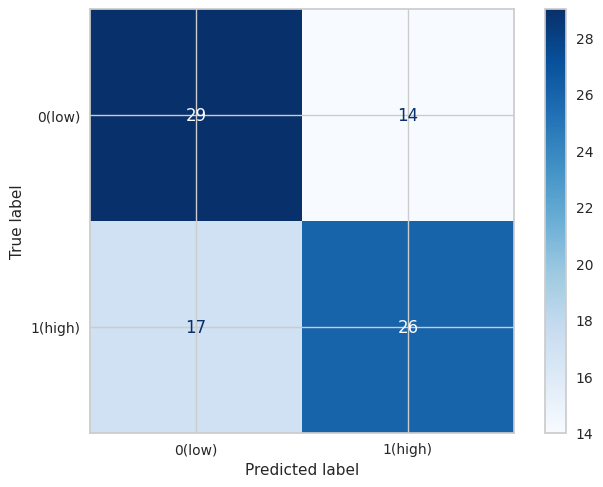

In [758]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(low)', 1: '1(high)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

- The top-left cell (28): Represents the number of instances of the 'low' class (0) correctly classified as 'low' (True Negatives, TN).

- The top-right cell (15): Represents the number of instances of the 'low' class (0) incorrectly classified as 'high' (False Positives, FP).

- The bottom-left cell (11): Represents the number of instances of the 'high' class (1) incorrectly classified as 'low' (False Negatives, FN).

- The bottom-right cell (32): Represents the number of instances of the 'high' class (1) correctly classified as 'high' (True Positives, TP).

- Decision Tree:

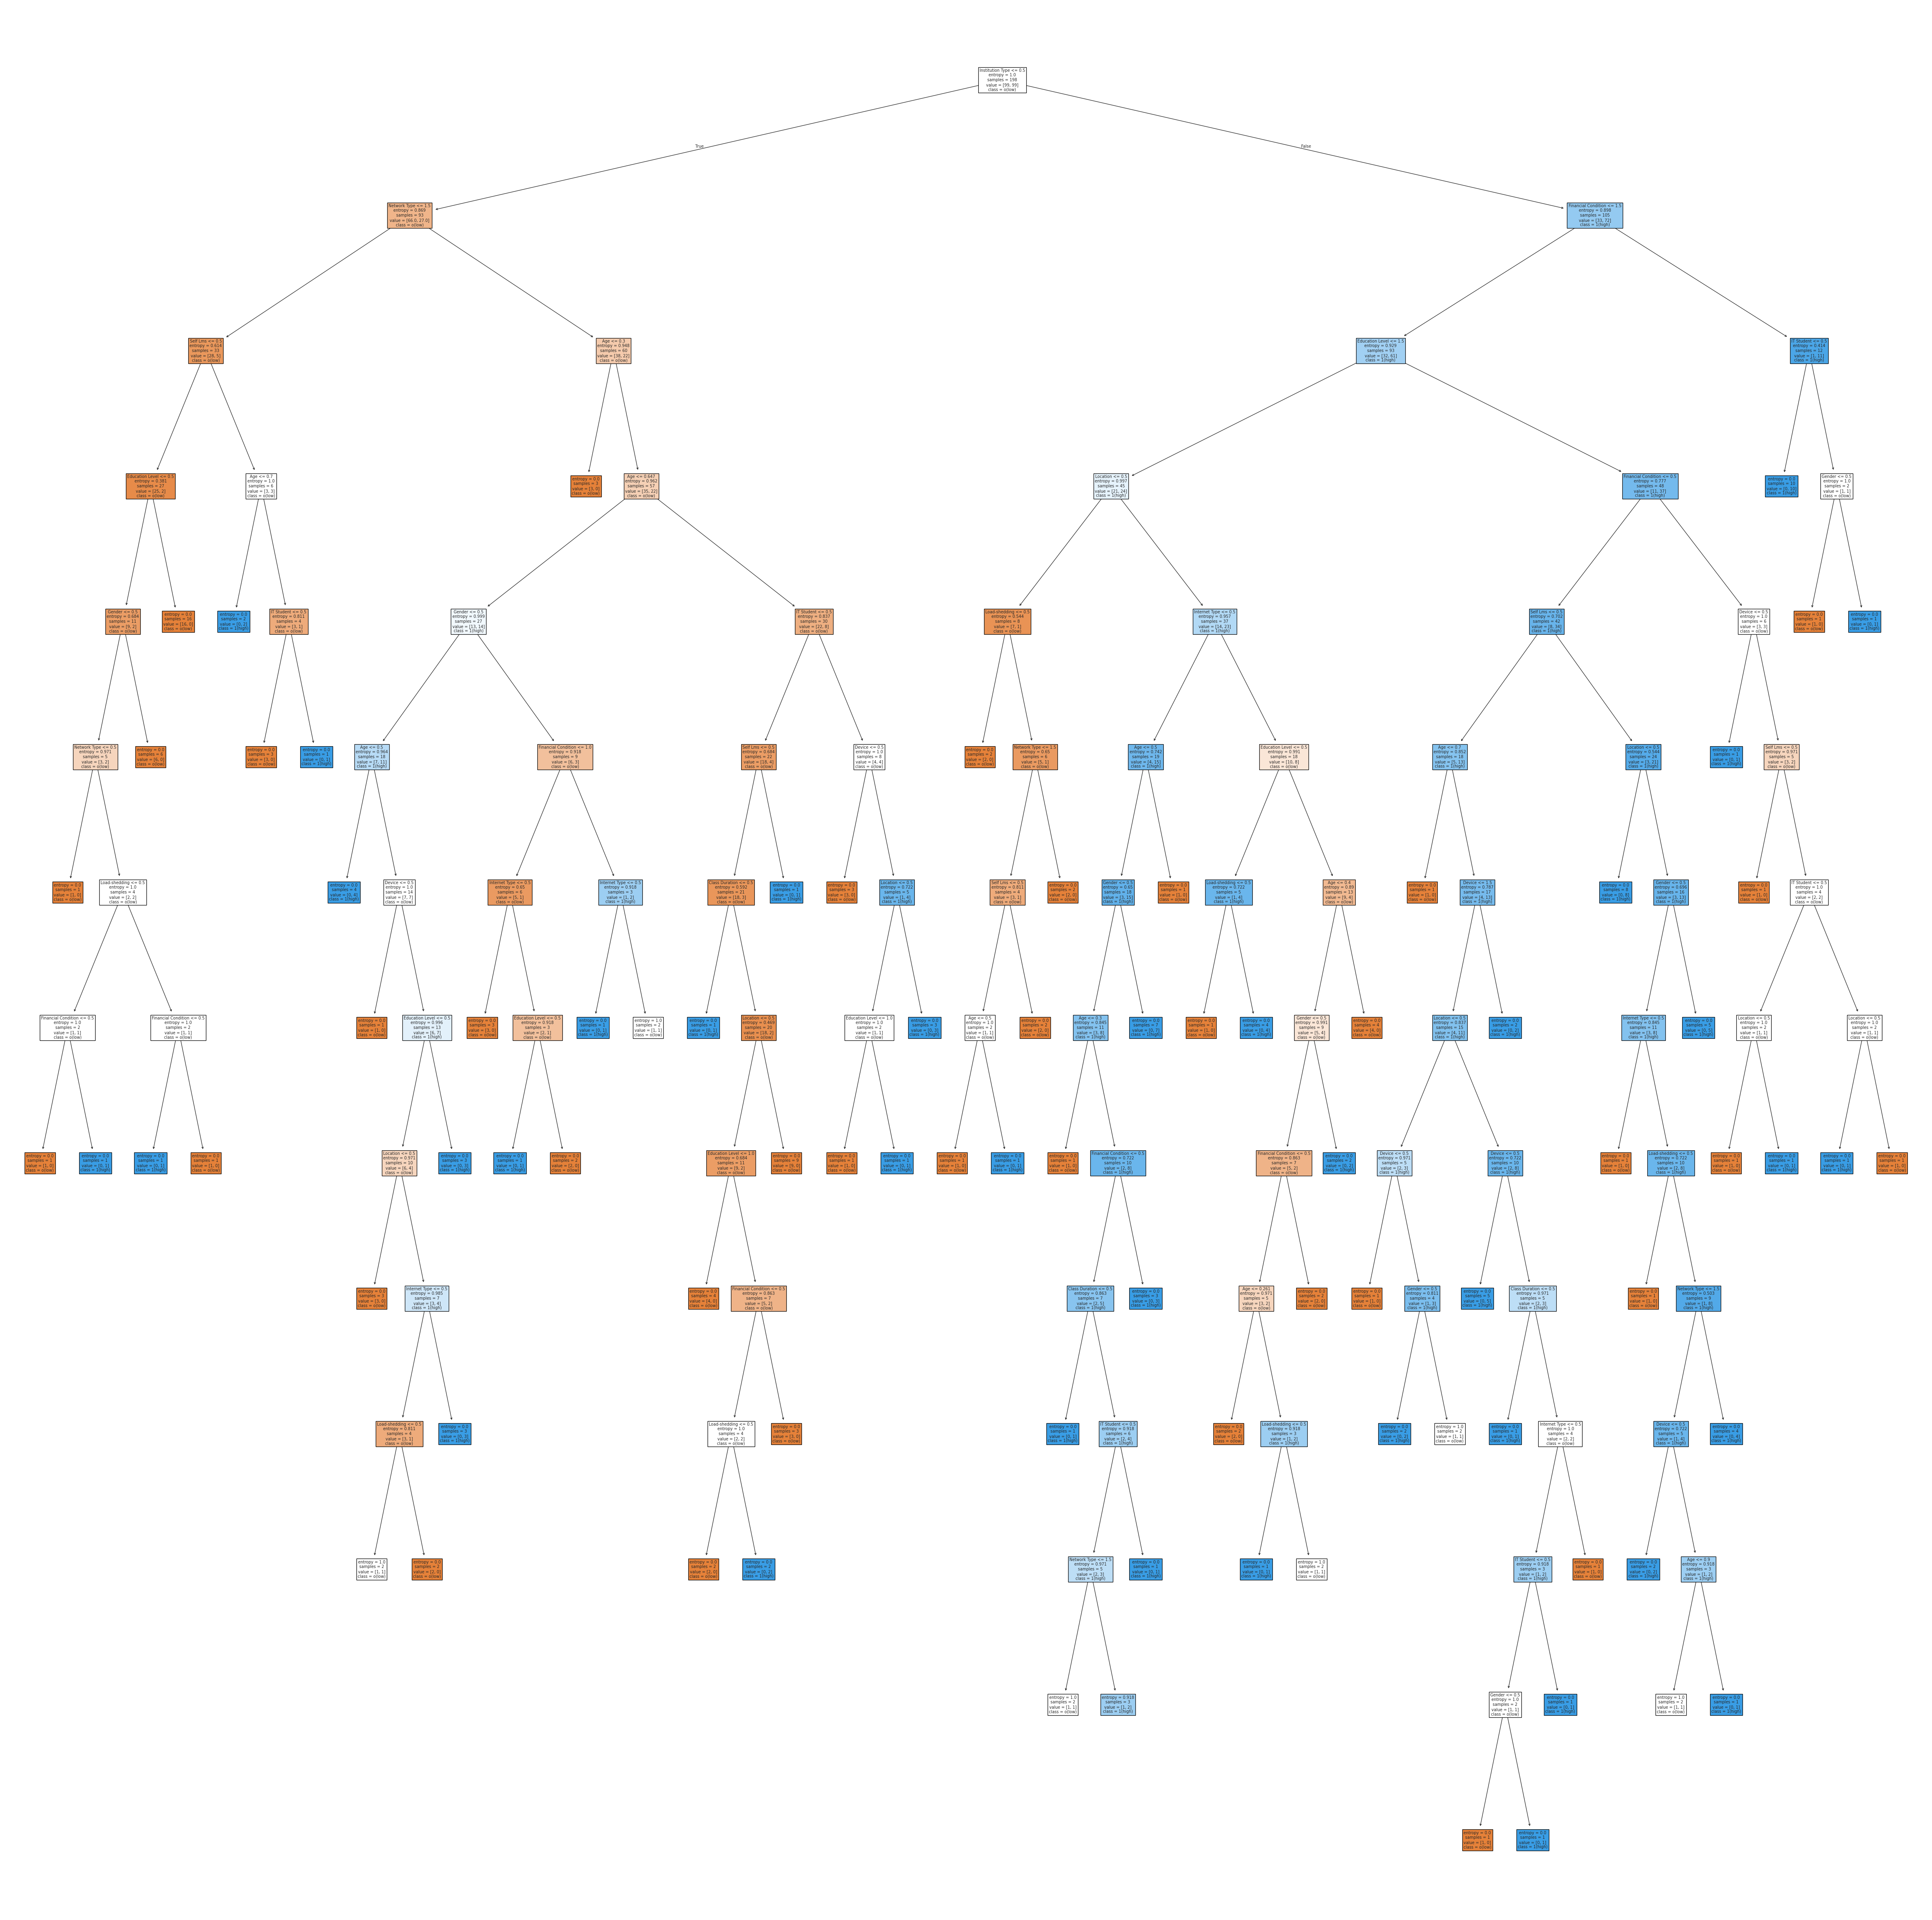

In [759]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)


class_labels = {0: 'o(low)' , 1:'1(high)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
               )

plt.show()

In this tree, the splitting process begins with the criterion of Institution Type, where samples are segregated based on their Institution Type values. The selection of features at each node is determined by their entropy values.

Following the split on Institution Type, the tree considers the Age and Device, dividing samples accordingly. Subsequently, the Load-shedding is examined, leading to further division of samples.

This splitting procedure persists for each attribute, guided by their respective values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether 'low' or 'high' adaptivity level) based on the path followed through the tree.

+ Splitting evaluation :

In [760]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[29 14]
 [17 26]]
Accuracy: 0.6395348837209303
Error Rate: 0.36046511627906974
Sensitivity: 0.6046511627906976
Specificity: 0.6744186046511628
Precision: 0.65


- Accuracy: measures the proportion of true results. In this case, the model's accuracy is calculated to be approximately 70%.
- Error Rate: represents the proportion of wrong predictions out of all predictions. Here, the error rate is around 30%.
- Sensitivity (Recall): measures the proportion of actual positives that are correctly identified. In this case, it's approximately 74%.
- Specificity: measures the proportion of actual negatives that are correctly identified. It's around 65% in this scenario.
- Precision: the proportion of positive identifications that were actually correct. Here, it's about 68%.

Outcomes:
- The model's accuracy is 70%, indicating that it correctly predicts the class label for about 70% of the instances.
- The sensitivity of 74% suggests a strong ability to correctly identify positive cases.
- The specificity of 65% shows the model’s ability to identify negative cases.
- The precision of 68% reflects a good level of accuracy in predicting positive outcomes.

Overall, the model demonstrates a relatively strong performance, with good sensitivity and precision, but improvements in specificity could further enhance its ability to correctly identify negative cases.

### Gini Index:

- Splitting Data

The model is trained utilizing the Gini index, and the dataset is divided into 70% training and 30% testing subsets.

In [761]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='gini')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- Confusion matrix:

[[28 15]
 [12 31]]


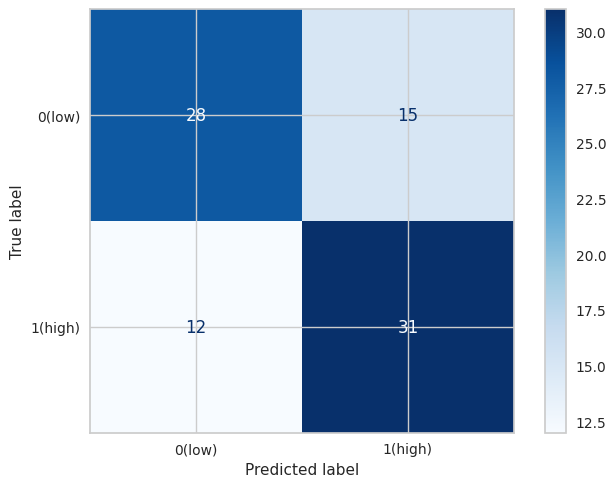

In [762]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(low)', 1: '1(high)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

- The top-left cell (27): Represents the number of instances of the 'low' class (0) correctly classified as 'low' (True Negatives, TN).

- The top-right cell (16): Represents the number of instances of the 'low' class (0) incorrectly classified as 'high' (False Positives, FP).

- The bottom-left cell (17): Represents the number of instances of the 'high' class (1) incorrectly classified as 'low' (False Negatives, FN).

- The bottom-right cell (26): Represents the number of instances of the 'high' class (1) correctly classified as 'high' (True Positives, TP).

- Decision Tree:

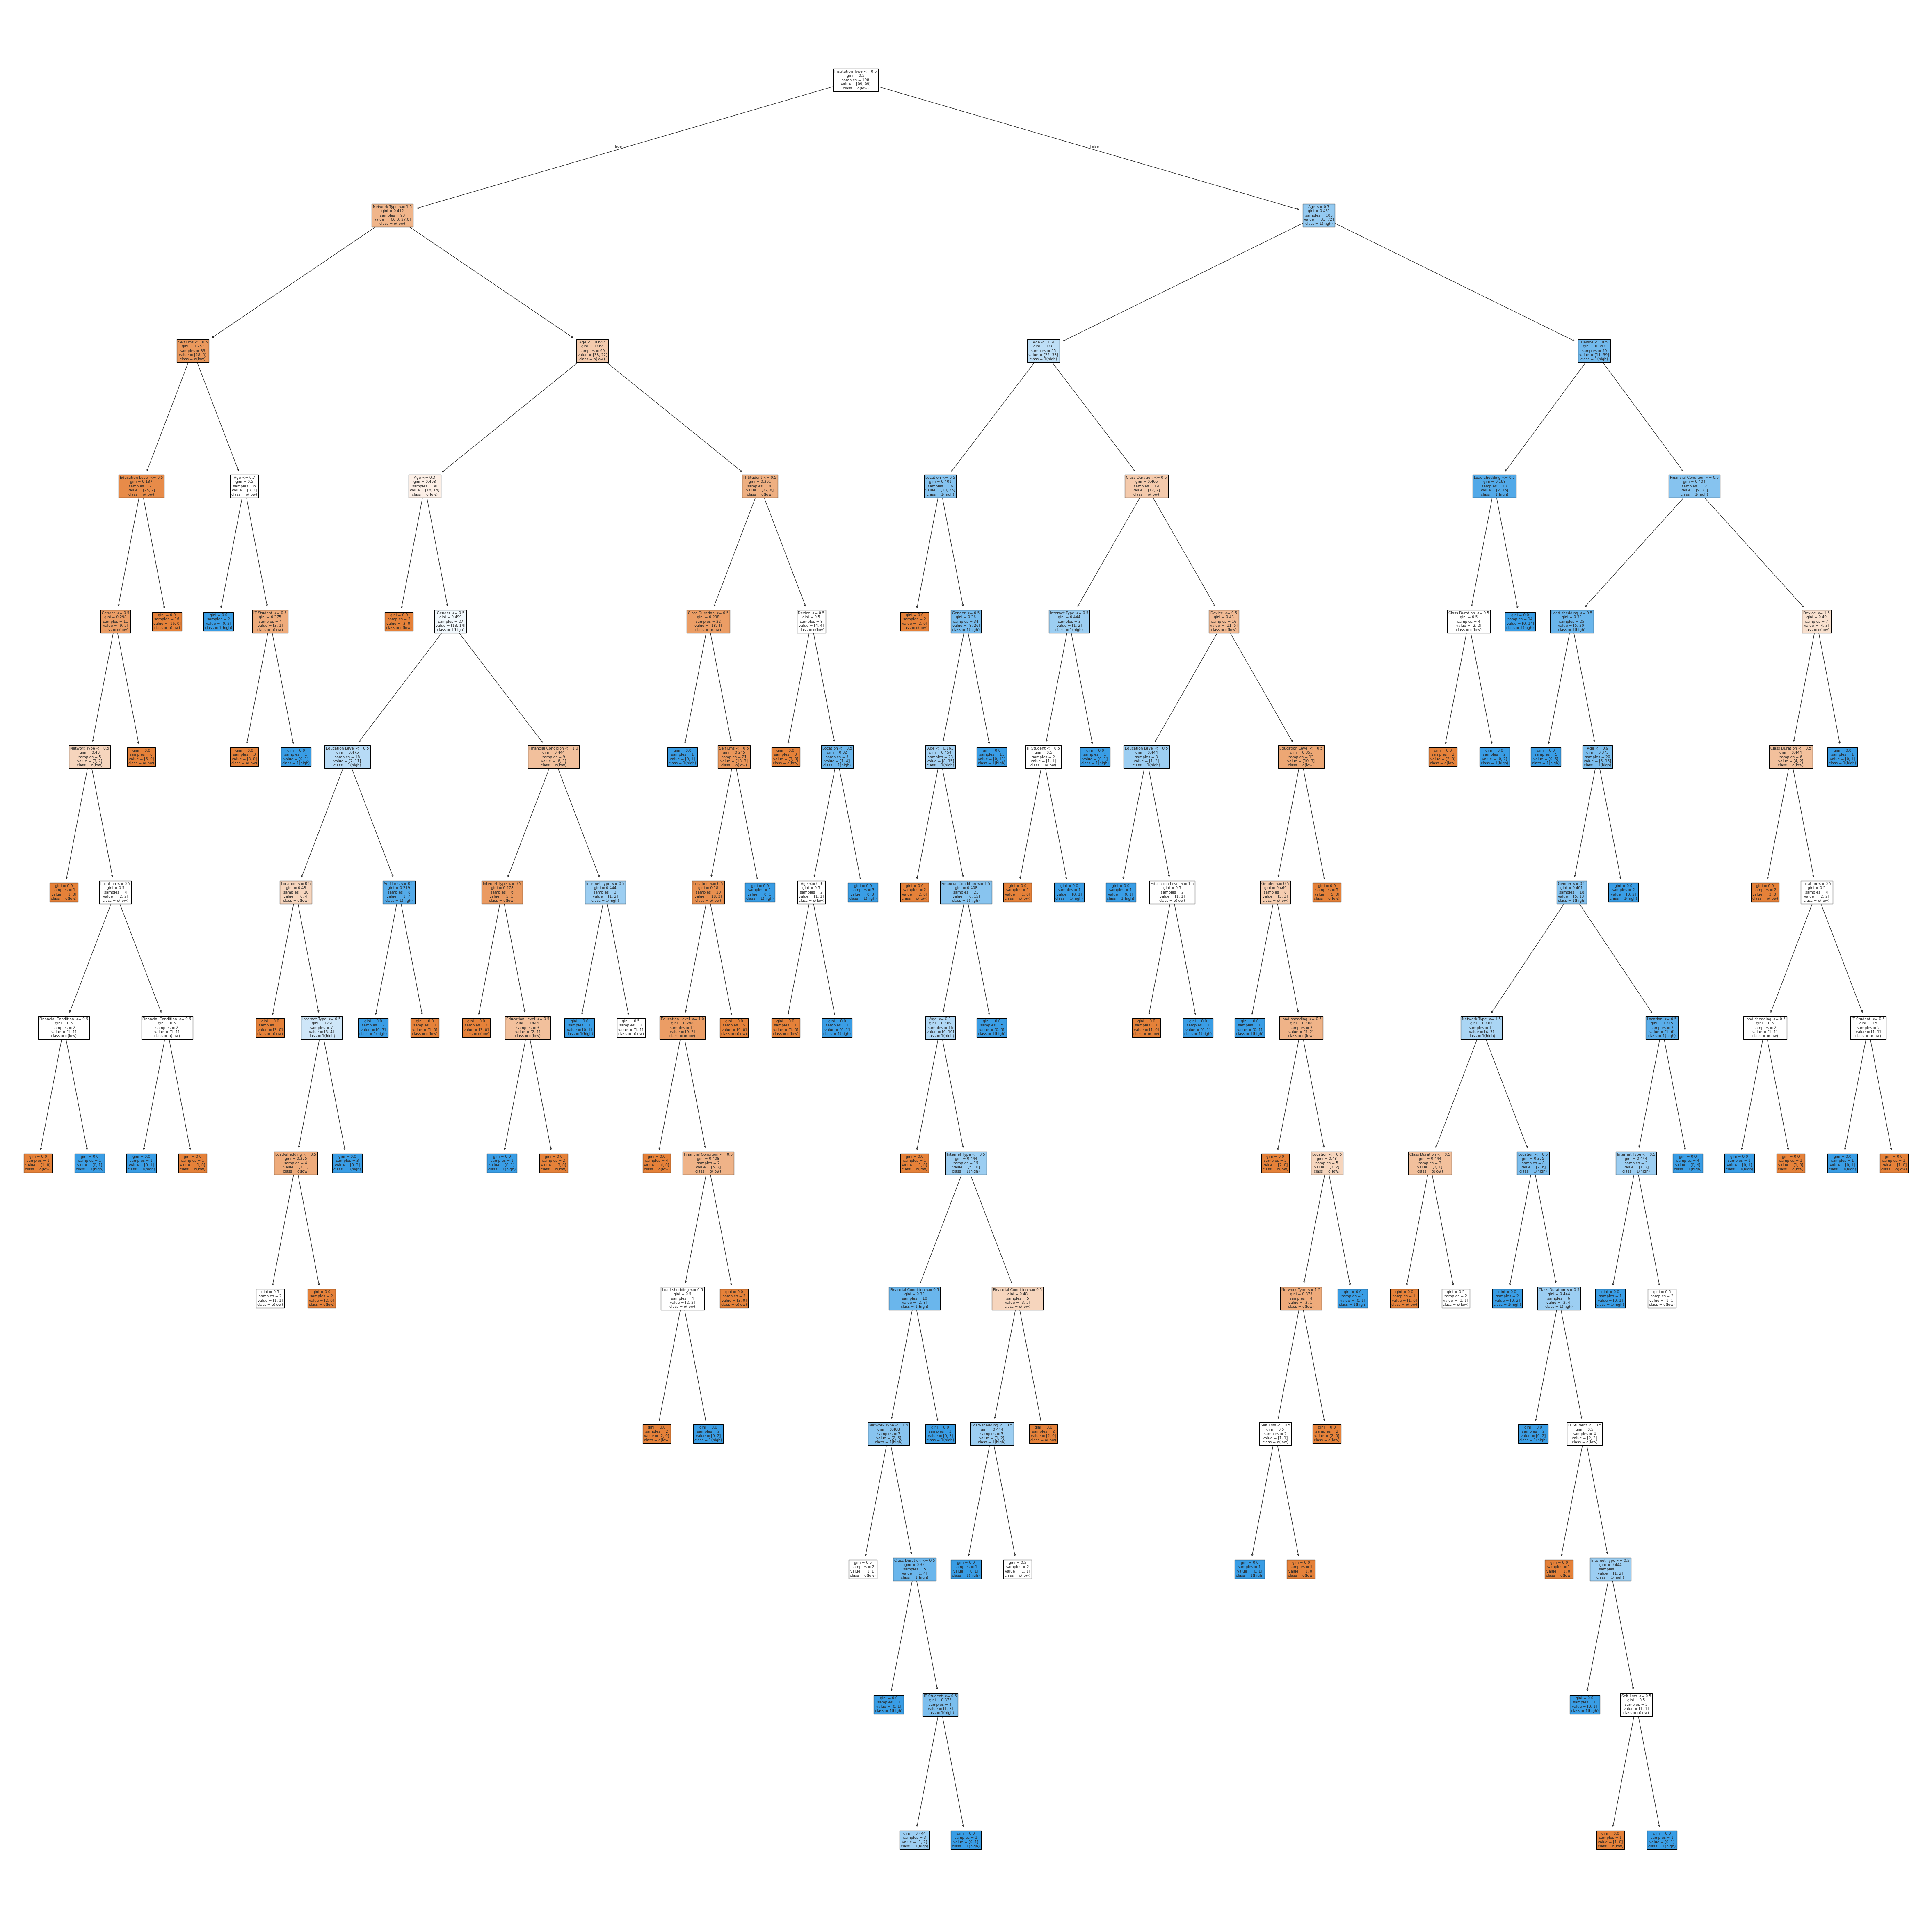

In [763]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)


class_labels = {0: 'o(low)' , 1:'1(high)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
               )

plt.show()

In this tree, the splitting process begins with the criterion of Institution Type, where samples are segregated based on their Institution Type values. The selection of features at each node is determined by their Gini values.

Following the split on Institution Type, the tree considers the Network Type and Load-shedding, dividing samples accordingly. Subsequently, the Self Lms is examined, leading to further division of samples.


This splitting procedure persists for each attribute, guided by their respective values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether 'low' or 'high' adaptivity level) based on the path followed through the tree.

+ Splitting evaluation :

In [764]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[28 15]
 [12 31]]
Accuracy: 0.686046511627907
Error Rate: 0.313953488372093
Sensitivity: 0.7209302325581395
Specificity: 0.6511627906976745
Precision: 0.6739130434782609


- Accuracy: measures the proportion of true results. In this case, the model's accuracy is calculated to be approximately 61%.
- Error Rate: represents the proportion of wrong predictions out of all predictions. Here, the error rate is around 38%.
- Sensitivity (Recall): measures the proportion of actual positives that are correctly identified. In this case, it's approximately 60%.
- Specificity: measures the proportion of actual negatives that are correctly identified. It's around 62% in this scenario.
- Precision: the proportion of positive identifications that were actually correct. Here, it's about 61%.

Outcomes:
- The model's accuracy is moderate, indicating that it correctly predicts the class label for around 61% of the instances.
- The sensitivity of 60% suggests a moderate ability to correctly identify positive cases of the condition.
- The specificity of 62% indicates the model’s ability to correctly identify negative cases, showing a reasonably good performance in recognizing class 0.
- The precision of 61% reflects a moderate level of accuracy in predicting positive outcomes, indicating that when the model predicts a positive outcome, it is correct approximately 61% of the time.

Given these metrics, the model demonstrates a moderate level of effectiveness in distinguishing between positive and negative cases.

>### 2- Splitting Data into: 60% Training and 40% Test

The model is trained utilizing the information gain(entropy), and the dataset is divided into 60% training and 40% testing subsets.

### Information Gain (entropy):

- Splitting Data

In [765]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- Confusion matrix:

[[42 14]
 [25 33]]


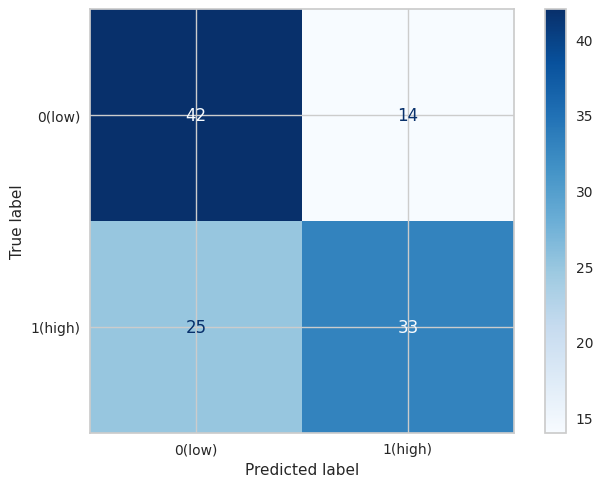

In [766]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(low)', 1: '1(high)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (38): Represents the number of instances of the 'low' class (0) correctly classified as 'low' (True Negatives, TN).

The top-right cell (18): Represents the number of instances of the 'low' class (0) incorrectly classified as 'high' (False Positives, FP).

The bottom-left cell (24): Represents the number of instances of the 'high' class (1) incorrectly classified as 'low' (False Negatives, FN).

The bottom-right cell (34): Represents the number of instances of the 'high' class (1) correctly classified as 'high' (True Positives, TP).

- Decision Tree:

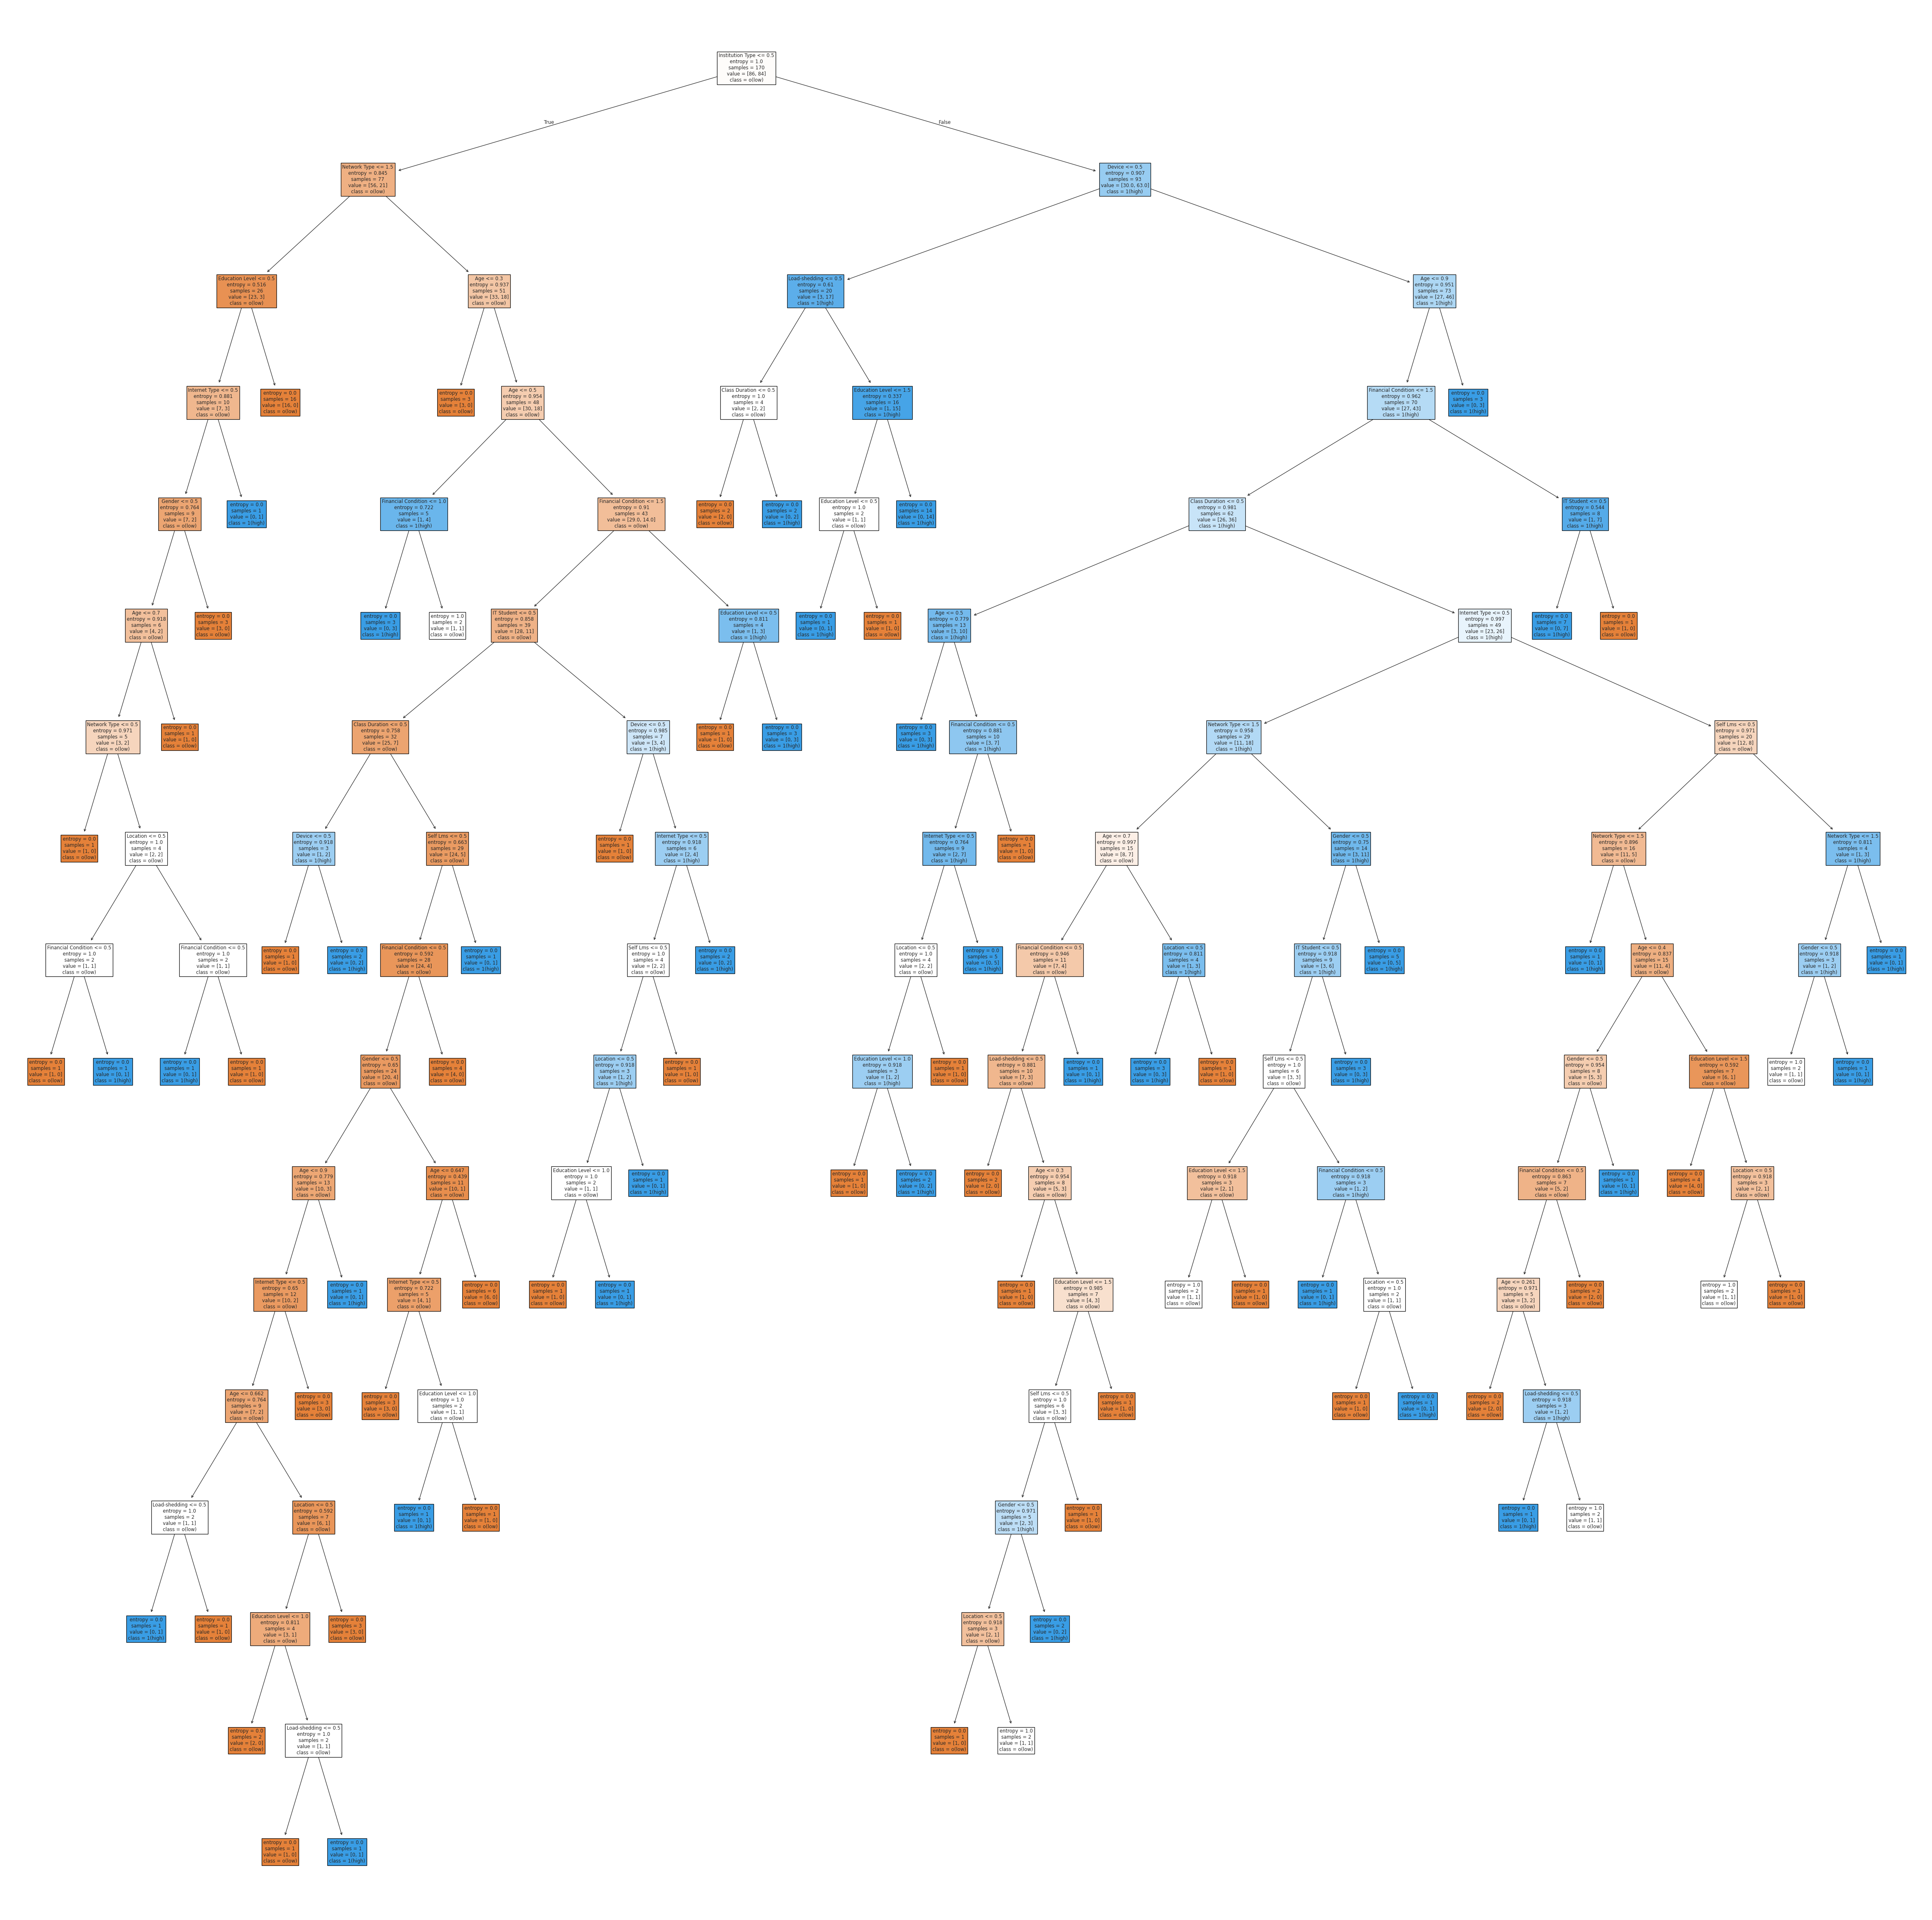

In [767]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)


class_labels = {0: 'o(low)' , 1:'1(high)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]], 
               filled=True
               )

plt.show()

In this tree, the splitting process begins with the criterion of Institution Type, where samples are segregated based on their Institution Type values. The selection of features at each node is determined by their entropy values.

Following the split on Institution Type, the tree considers the Network Type and Device, dividing samples accordingly. Subsequently, the Load-shedding is examined, leading to further division of samples.

This splitting procedure persists for each attribute, guided by their respective values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether 'low' or 'high' adaptivity level) based on the path followed through the tree.

In this tree, the splitting process begins with the criterion of Institution Type, where samples are segregated based on their Institution Type values. The selection of features at each node is determined by their entropy values.

Following the split on Institution Type, the tree considers the Age and Device, dividing samples accordingly. Subsequently, the Load-shedding is examined, leading to further division of samples.

This splitting procedure persists for each attribute, guided by their respective values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether 'low' or 'high' adaptivity level) based on the path followed through the tree.

+ Splitting evaluation :

In [768]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[42 14]
 [25 33]]
Accuracy: 0.6578947368421053
Error Rate: 0.3421052631578947
Sensitivity: 0.5689655172413793
Specificity: 0.75
Precision: 0.7021276595744681


- Accuracy: measures the proportion of true results. In this case, the model's accuracy is calculated to be approximately 63%.
- Error Rate: represents the proportion of wrong predictions out of all predictions. Here, the error rate is around 37%.
- Sensitivity (Recall): measures the proportion of actual positives that are correctly identified. In this case, it's approximately 59%.
- Specificity: measures the proportion of actual negatives that are correctly identified. It's around 68% in this scenario.
- Precision: the proportion of positive identifications that were actually correct. Here, it's about 65%.

Outcomes:
- The model's accuracy is 63%, indicating that it almost correctly predicts the class label for about 63% of the instances.
- The sensitivity of 59% suggests the ability to correctly identify positive cases.
- The specificity of 68% shows the model’s ability to identify negative cases.
- The precision of 65% reflects a good level of accuracy in predicting positive outcomes.

Overall, the model demonstrates a moderate performance, with strong specificity and precision, but improvements in sensitivity could enhance its ability to correctly identify positive cases.

### Gini Index:

- Splitting Data

The model is trained utilizing the Gini index, and the dataset is divided into 60% training and 40% testing subsets.

In [769]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='gini')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- Confusion matrix:

[[36 20]
 [23 35]]


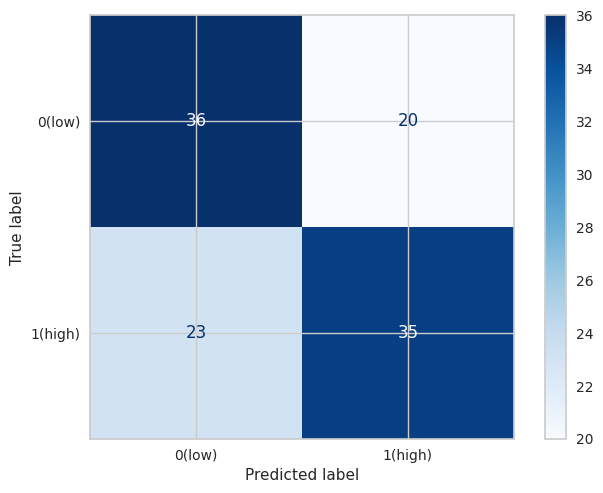

In [770]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(low)', 1: '1(high)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (33): Represents the number of instances of the 'low' class (0) correctly classified as 'low' (True Negatives, TN).

The top-right cell (23): Represents the number of instances of the 'low' class (0) incorrectly classified as 'high' (False Positives, FP).

The bottom-left cell (18): Represents the number of instances of the 'high' class (1) incorrectly classified as 'low' (False Negatives, FN).

The bottom-right cell (40): Represents the number of instances of the 'high' class (1) correctly classified as 'high' (True Positives, TP).

- Decision Tree:

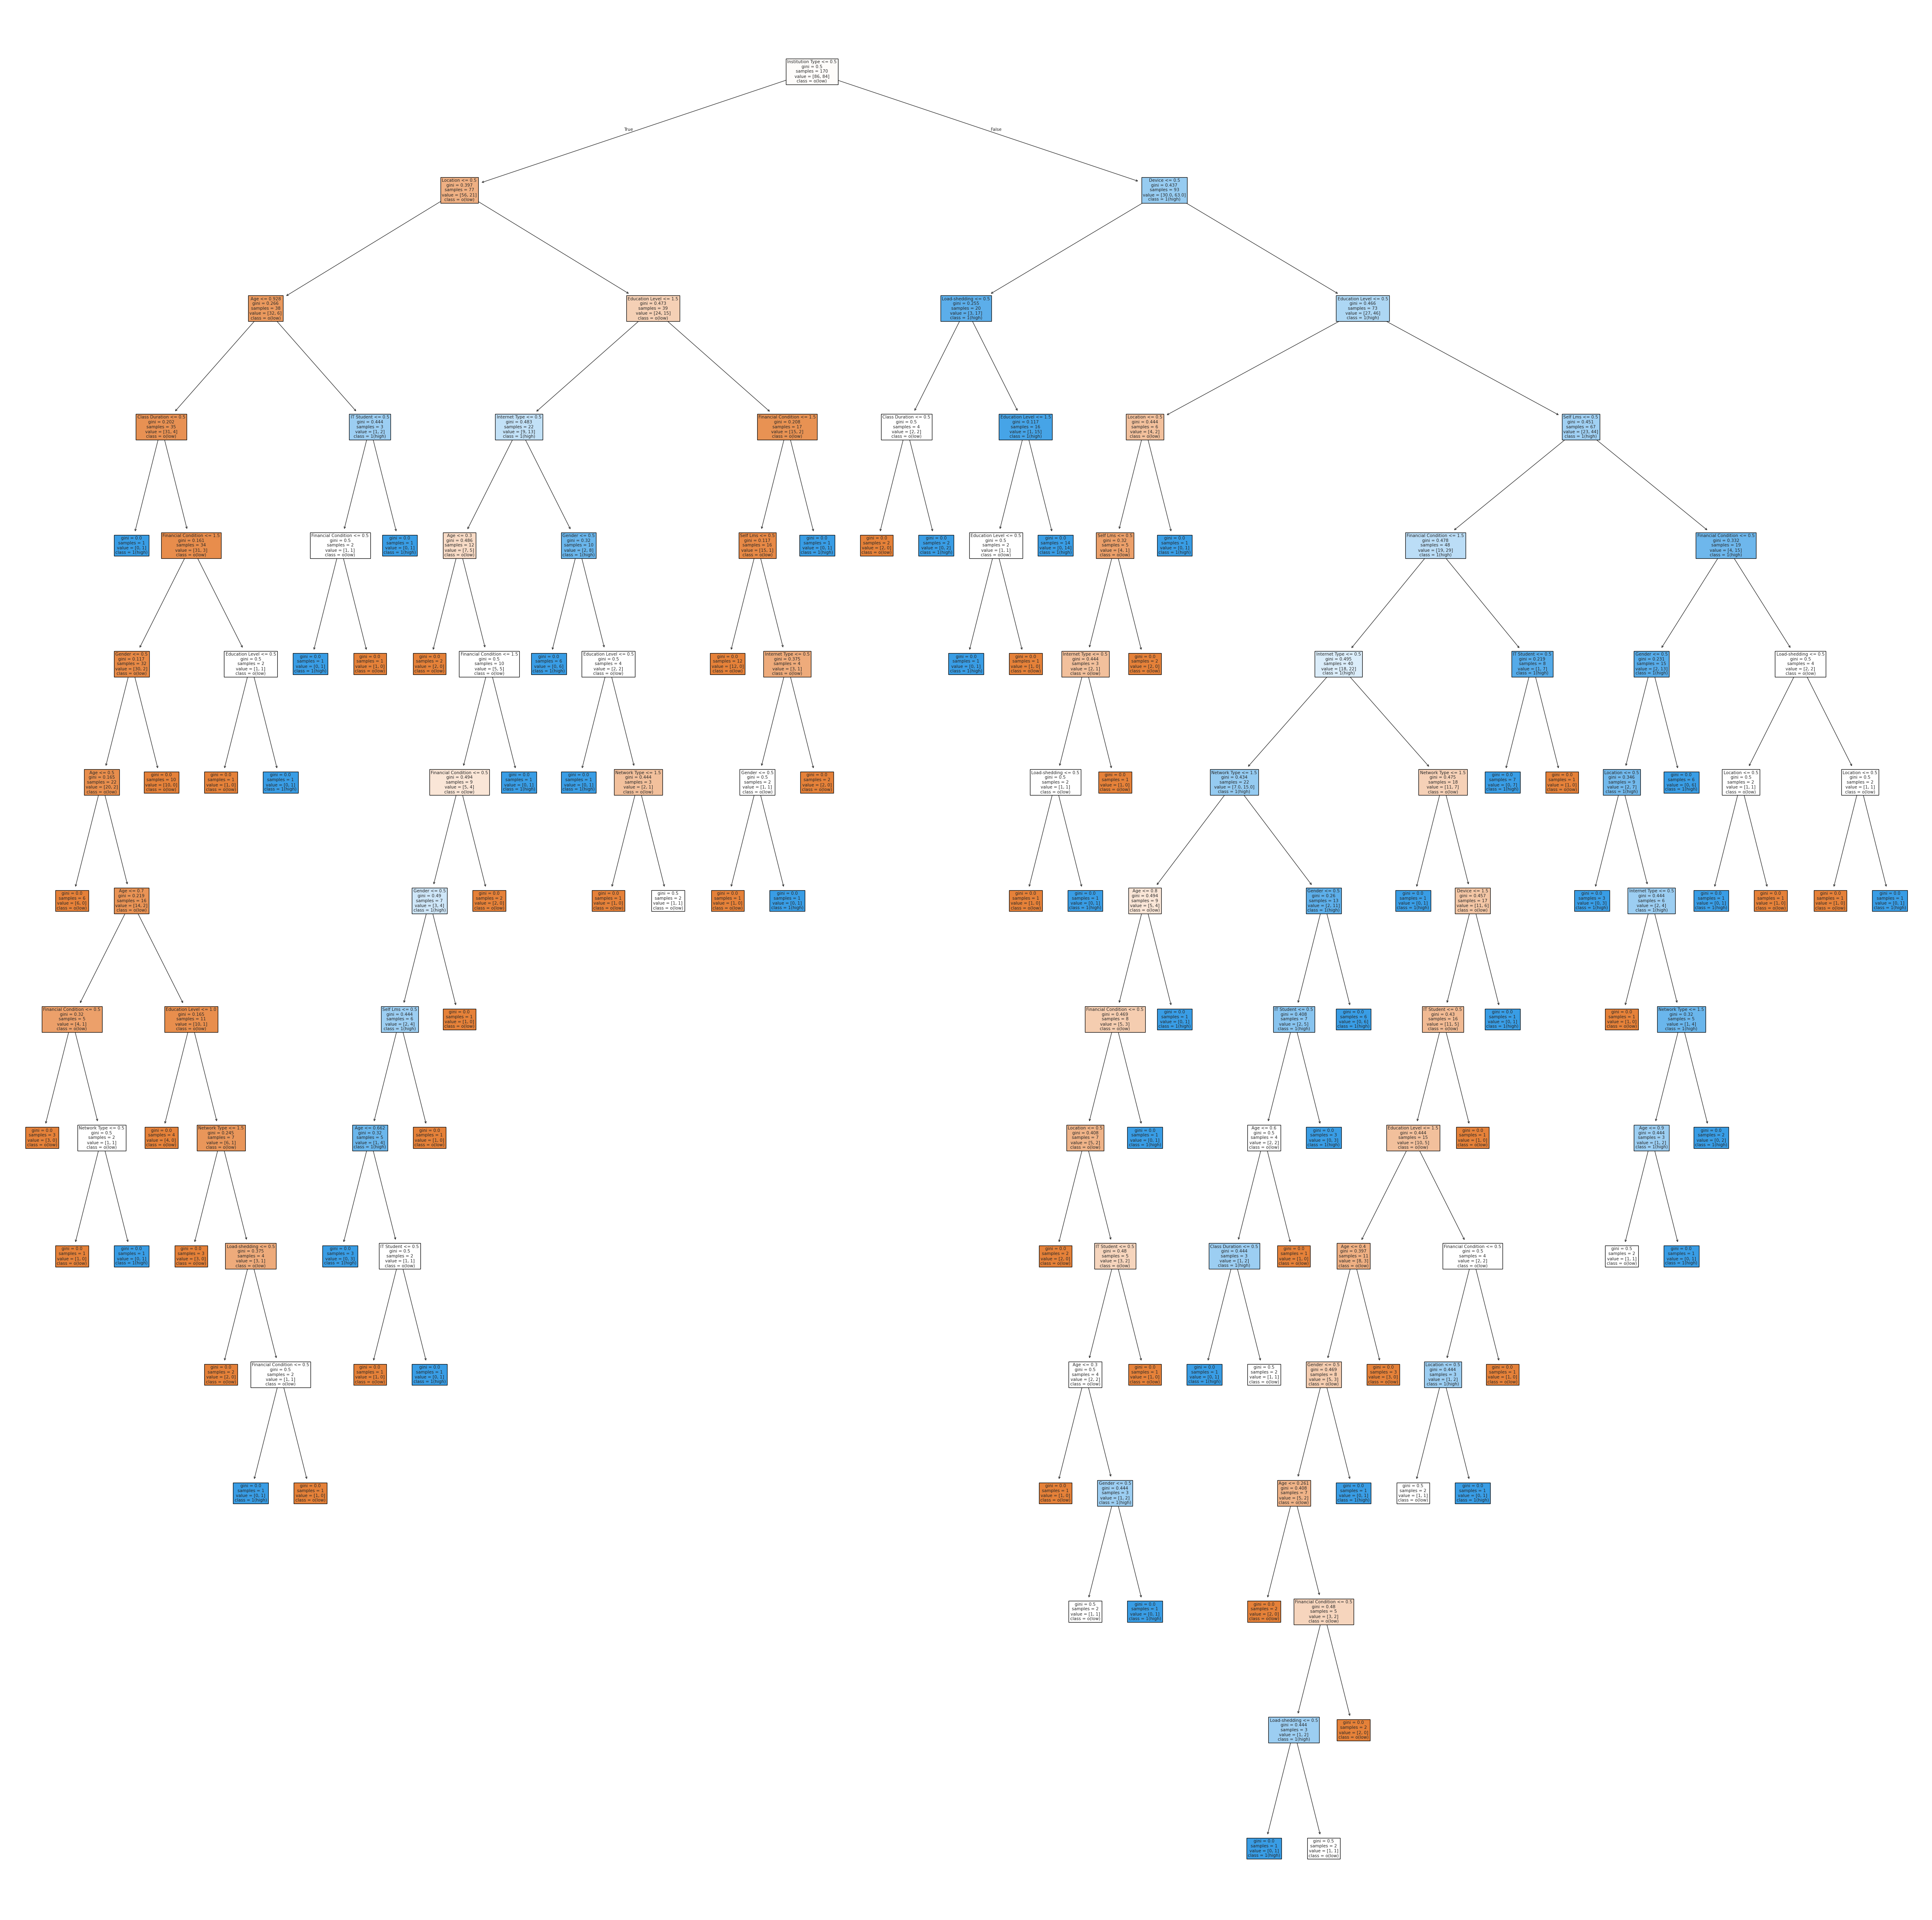

In [771]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)


class_labels = {0: 'o(low)' , 1:'1(high)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

In this tree, the splitting process begins with the criterion of Institution Type, where samples are segregated based on their Institution Type values. The selection of features at each node is determined by their Gini values.

Following the split on Institution Type, the tree considers the Network Type and Device, dividing samples accordingly. Subsequently, the Education Level is examined, leading to further division of samples.

This splitting procedure persists for each attribute, guided by their respective values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether 'low' or 'high' adaptivity level) based on the path followed through the tree.

+ Splitting evaluation :

In [772]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[36 20]
 [23 35]]
Accuracy: 0.6228070175438597
Error Rate: 0.3771929824561403
Sensitivity: 0.603448275862069
Specificity: 0.6428571428571429
Precision: 0.6363636363636364


- Accuracy: measures the proportion of true results. In this case, the model's accuracy is calculated to be approximately 64%.
- Error Rate: represents the proportion of wrong predictions out of all predictions. Here, the error rate is around 36%.
- Sensitivity (Recall): measures the proportion of actual positives that are correctly identified. In this case, it's approximately 69%.
- Specificity: measures the proportion of actual negatives that are correctly identified. It's around 59% in this scenario.
- Precision: the proportion of positive identifications that were actually correct. Here, it's about 63%.

Outcomes:

- The model's accuracy is moderate, indicating it correctly predicts the class label for around 64% of the instances.
- The sensitivity of 69% suggests a moderate ability to identify positive cases of the condition correctly.
- The specificity of 59% indicates the model’s ability to correctly identify negative cases, showing a reasonably good performance in recognizing class 0.
- The precision of 63% reflects a moderate level of accuracy in predicting positive outcomes, indicating that when the model predicts a positive outcome, it is correct approximately 63% of the time.

Given these metrics, the model demonstrates a moderate level of effectiveness in distinguishing between positive and negative cases, with relatively stronger performance in identifying positive cases but a need for improvement in reducing error rate and increasing specificity.

>### 3- Splitting Data into: 80% Training and 20% Test

### Information Gain (entropy):

- Splitting Data

In [773]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- Confusion matrix:

[[22 10]
 [11 14]]


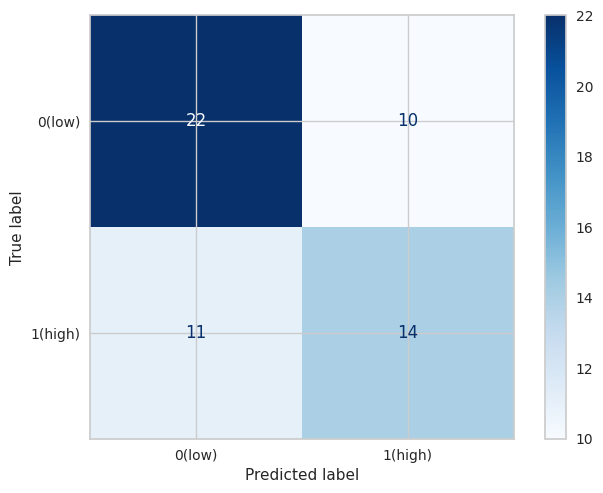

In [774]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(low)', 1: '1(high)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Decision Tree:

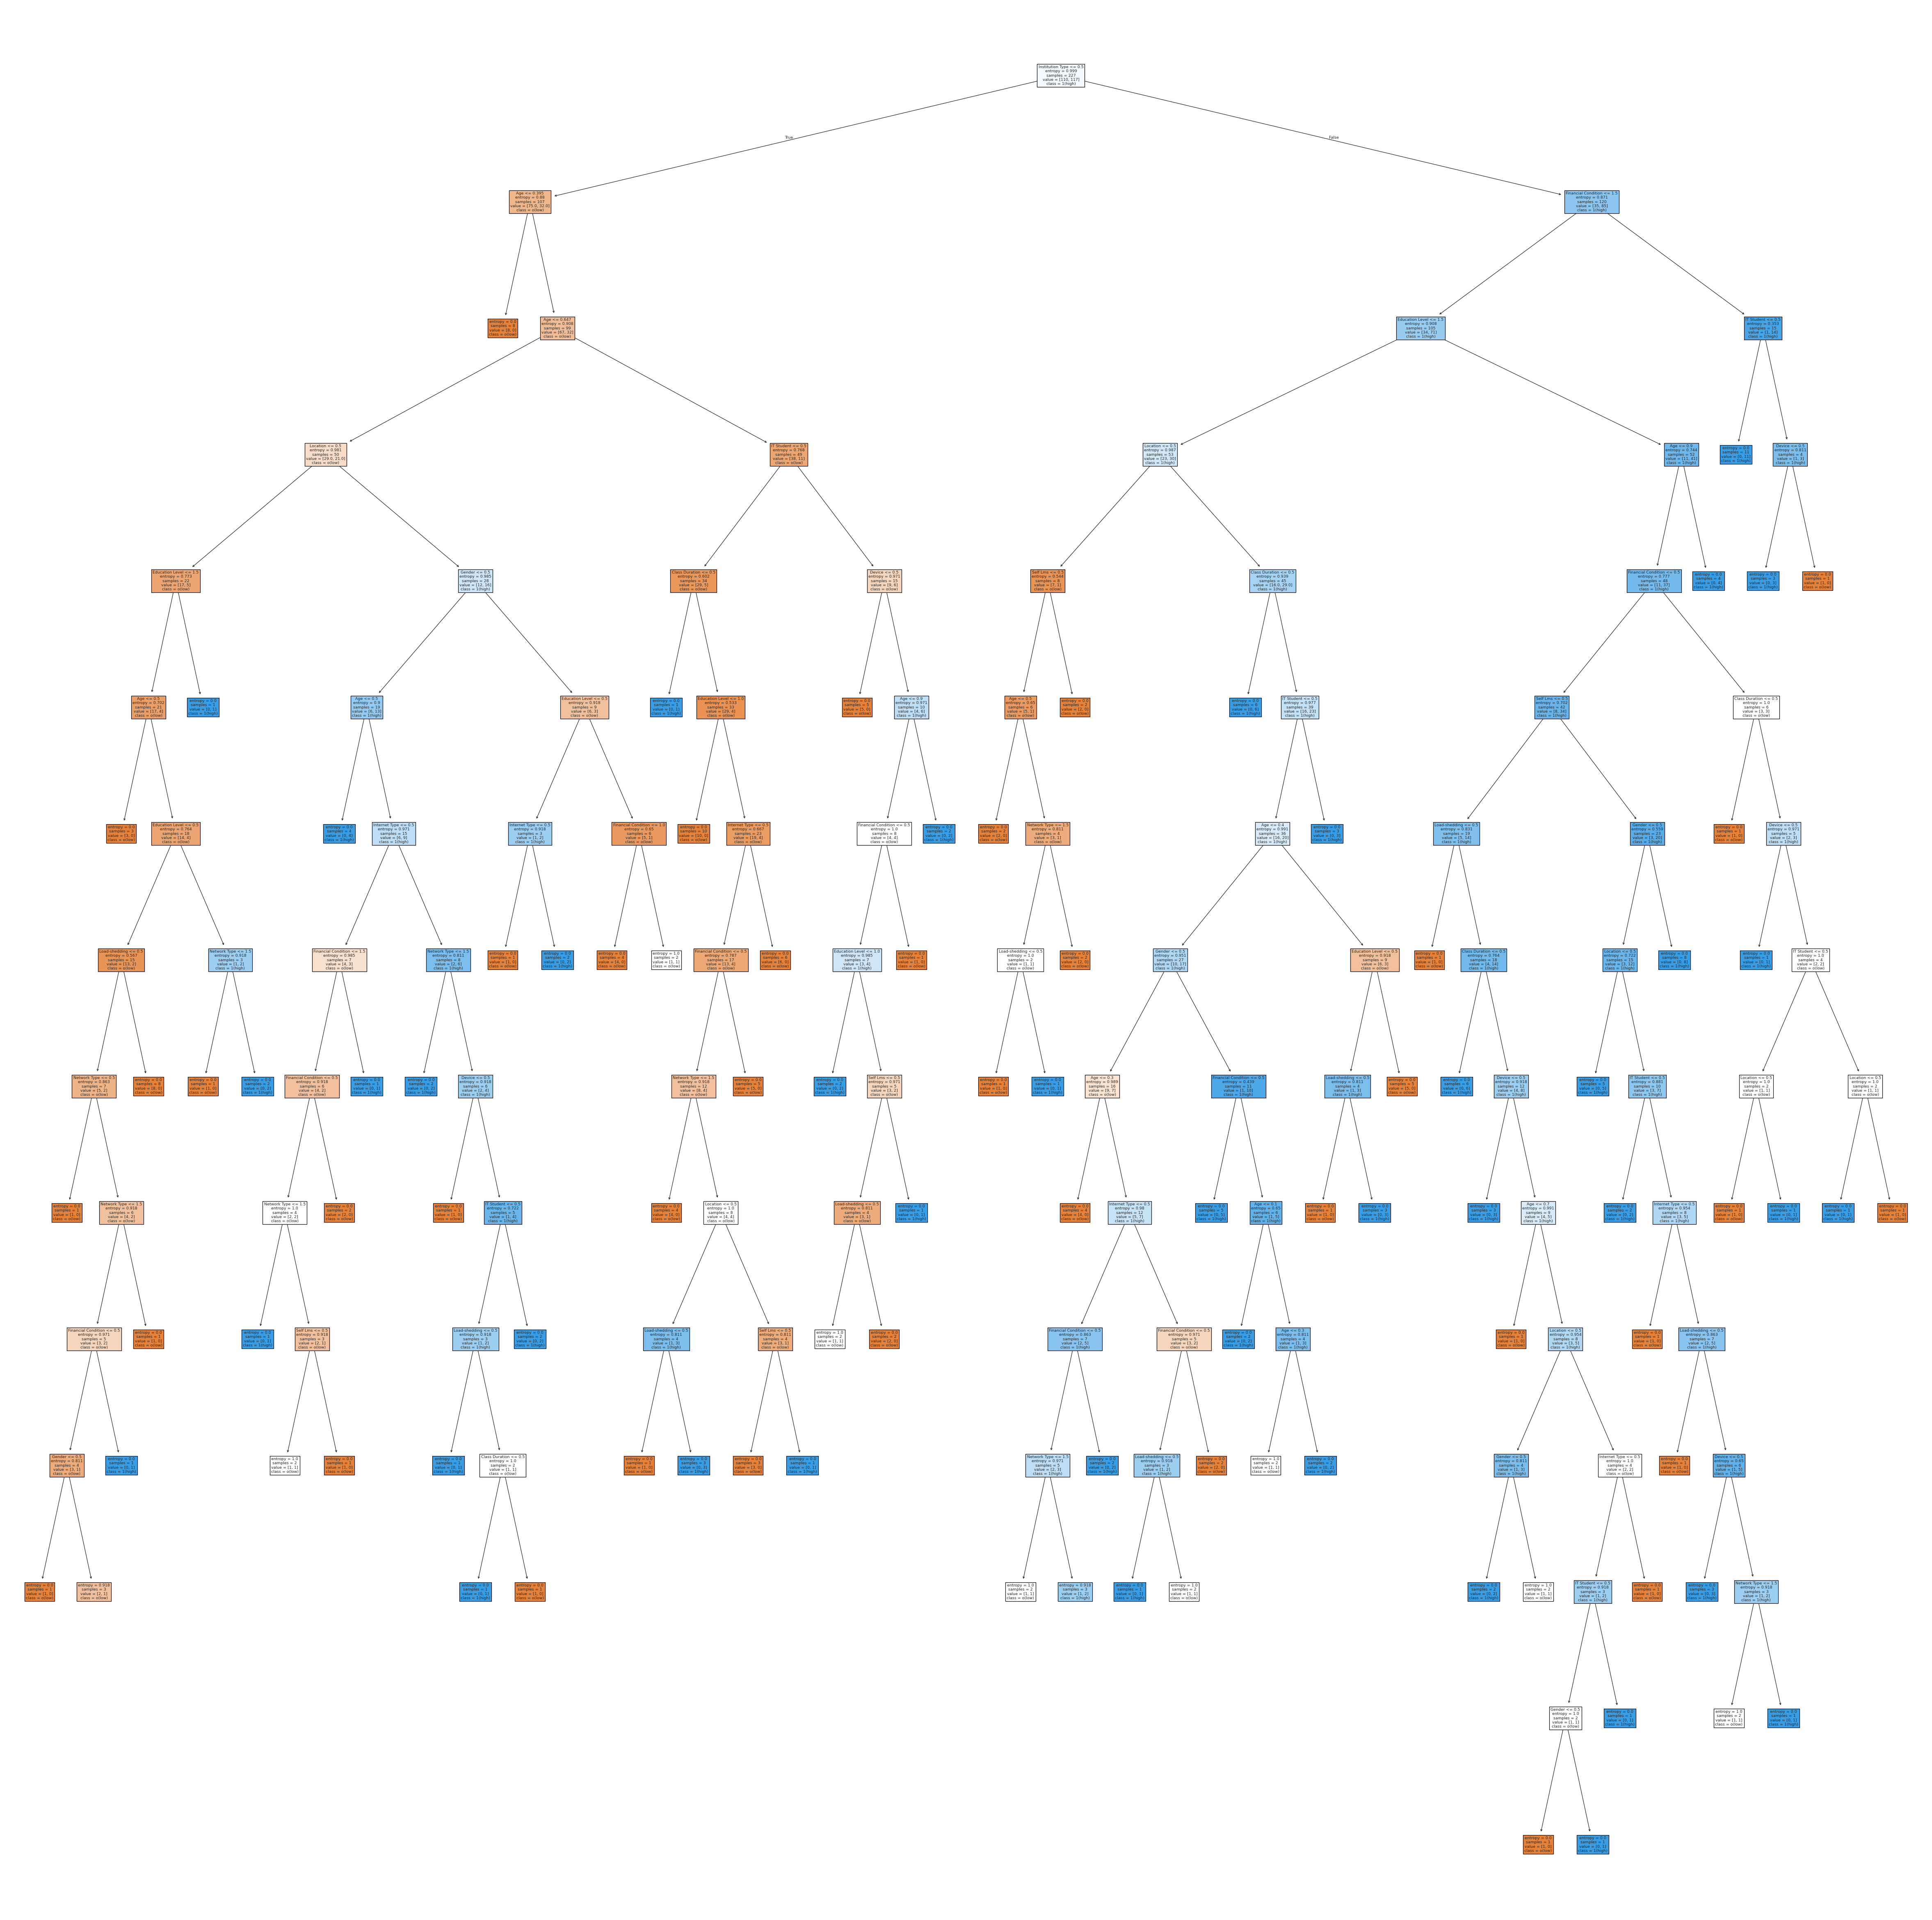

In [775]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)


class_labels = {0: 'o(low)' , 1:'1(high)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

+ Splitting evaluation :

In [776]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[22 10]
 [11 14]]
Accuracy: 0.631578947368421
Error Rate: 0.368421052631579
Sensitivity: 0.56
Specificity: 0.6875
Precision: 0.5833333333333334


+ Accuracy:

+ Error Rate:

+ Sensitivity (True Positive Rate):

+ Specificity (True Negative Rate):

+ Precision (Positive Predictive Value):

### Gini Index:

- Splitting Data

In [777]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier(criterion='gini')

clf = clf. fit (X_train, y_train)

y_pred = clf.predict (X_test)

- Confusion matrix:

[[28 15]
 [12 31]]


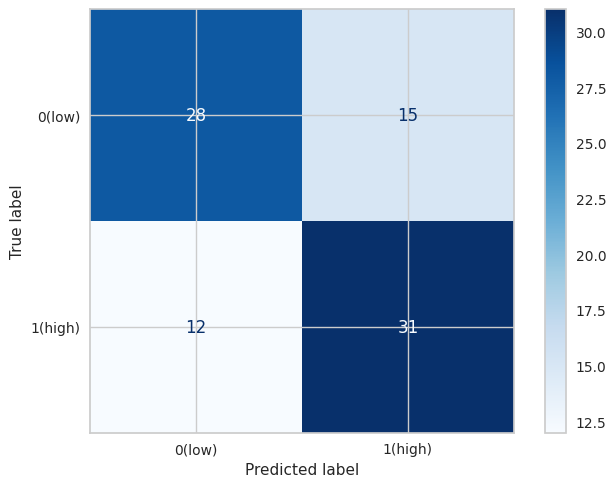

In [778]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# Assuming you already have cm, y_test, and y_pred computed
cm = confusion_matrix(y_test, y_pred)

class_labels = {0: '0(low)', 1: '1(high)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Decision Tree:

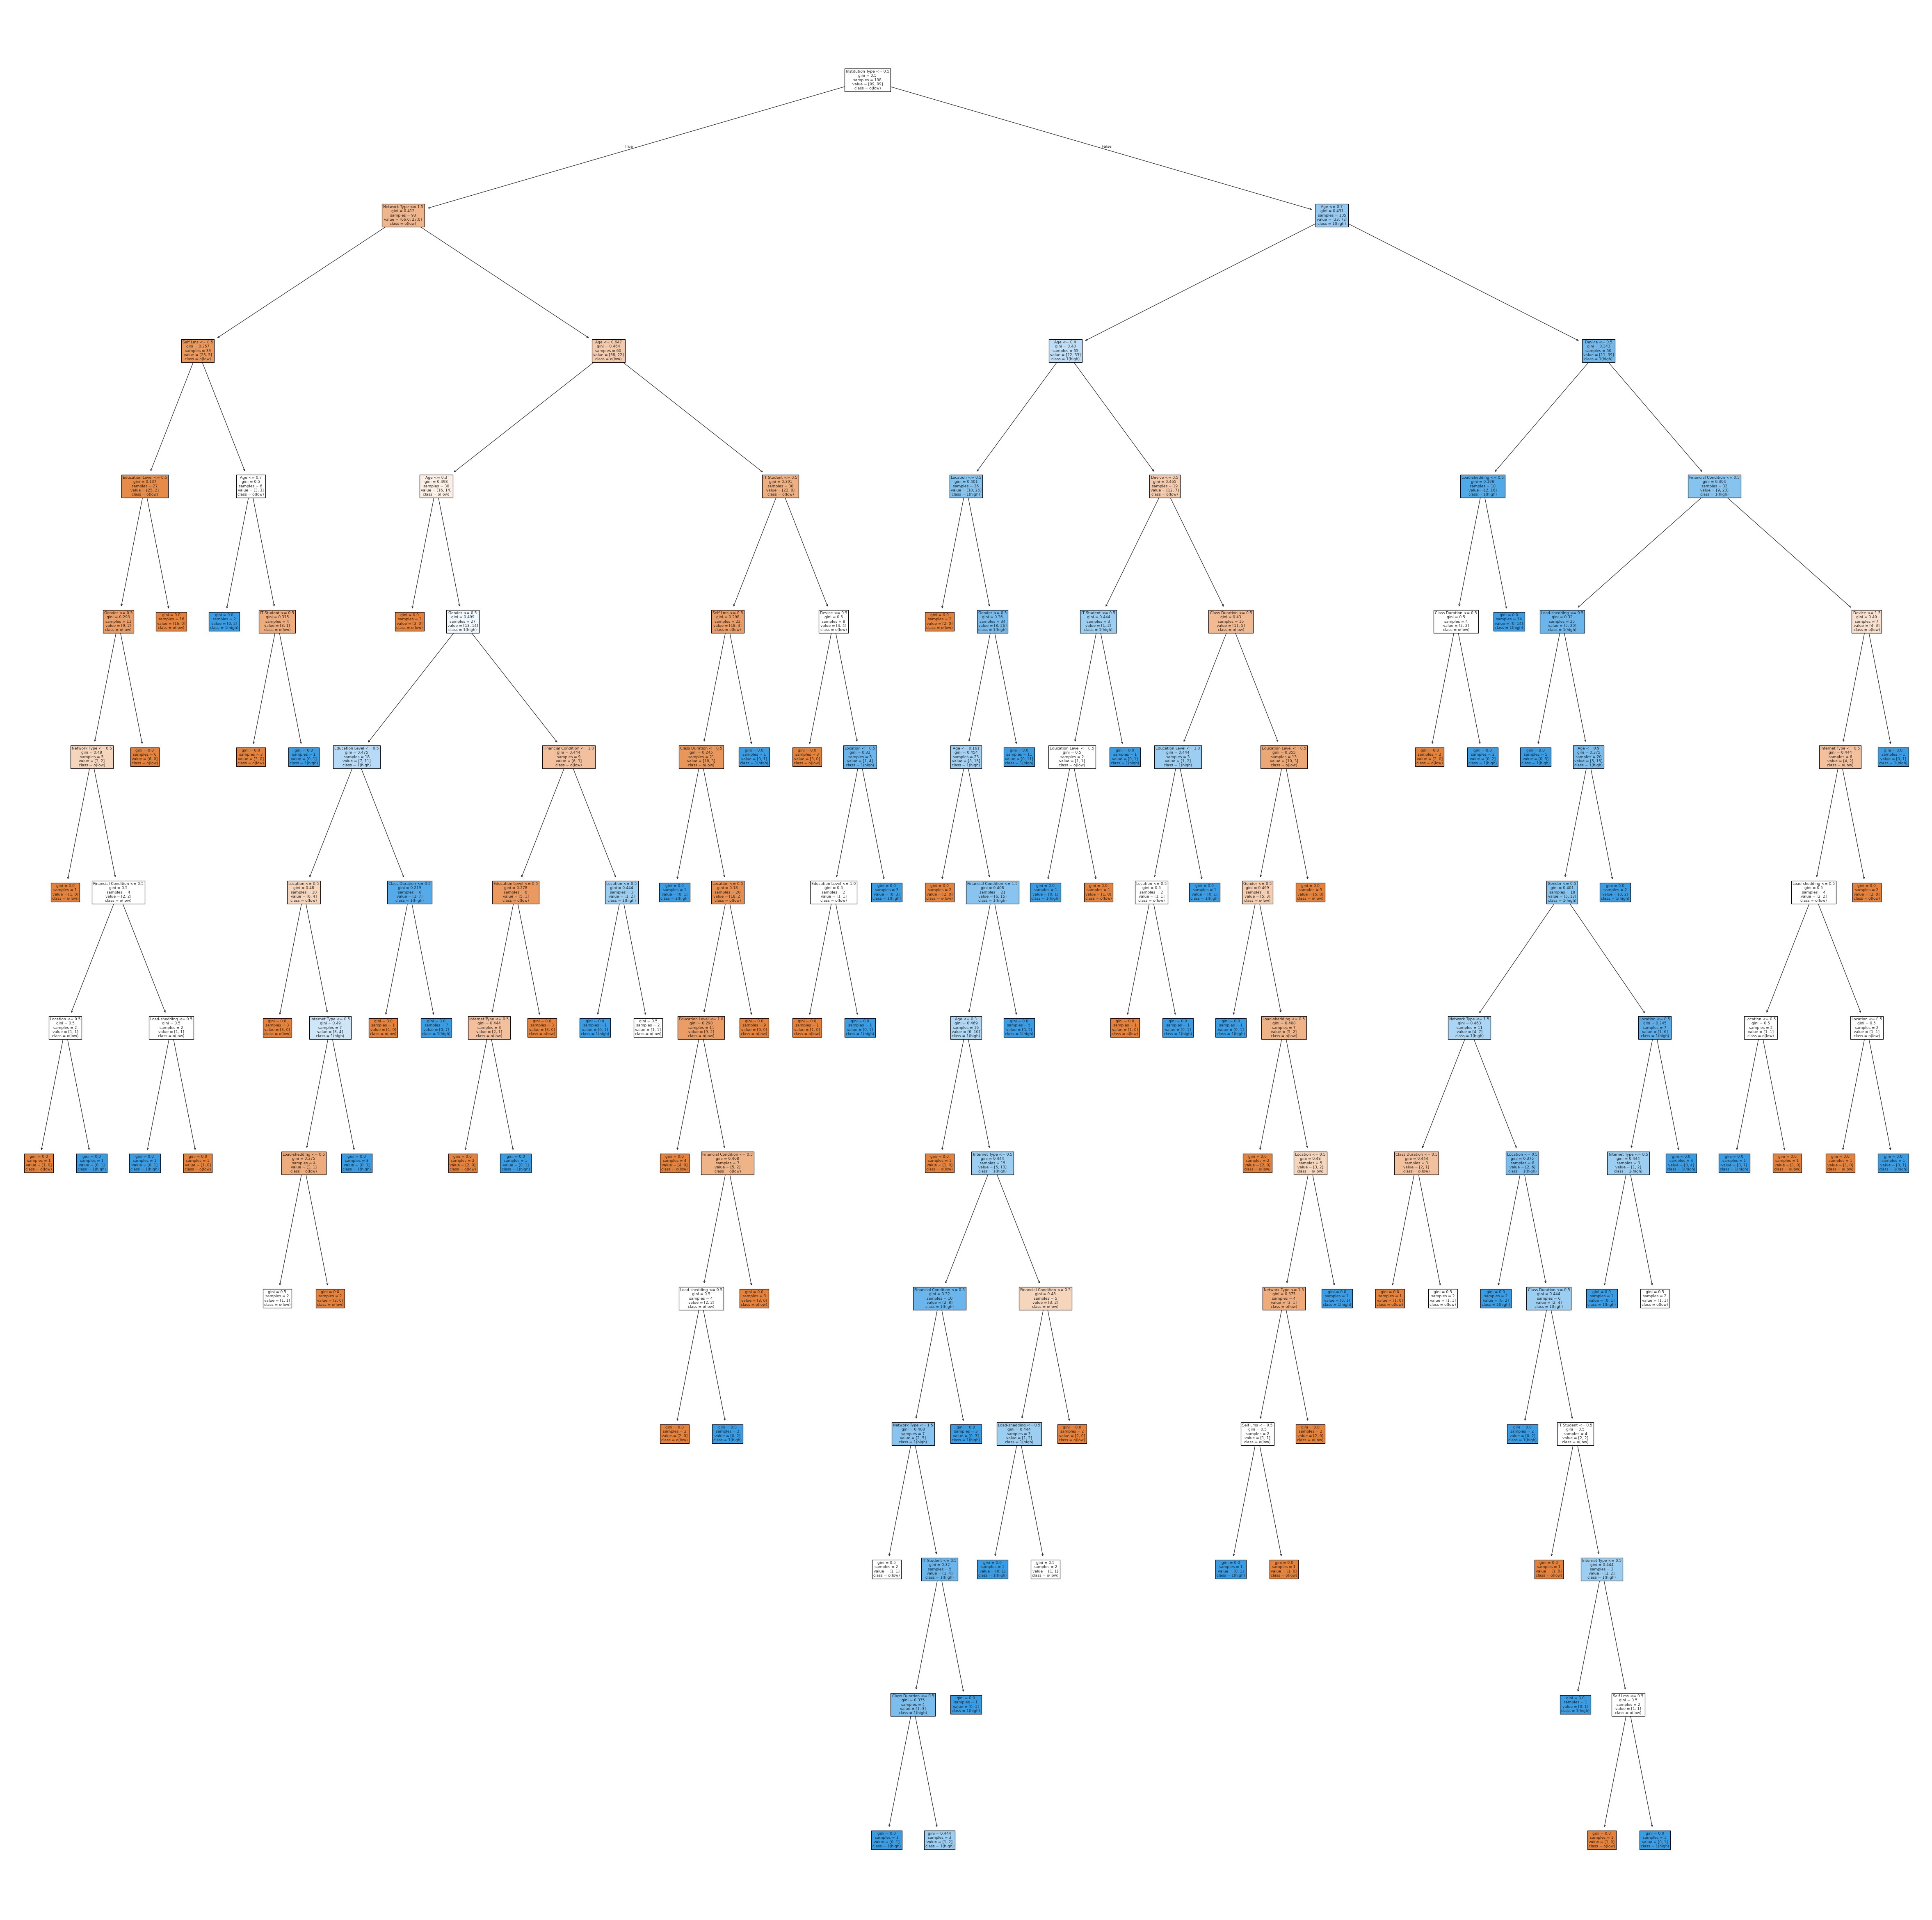

In [779]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=300)


class_labels = {0: 'o(low)' , 1:'1(high)'}

tree.plot_tree(clf,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()

+ Splitting evaluation :

In [780]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm)

# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[28 15]
 [12 31]]
Accuracy: 0.686046511627907
Error Rate: 0.313953488372093
Sensitivity: 0.7209302325581395
Specificity: 0.6511627906976745
Precision: 0.6739130434782609


+ Accuracy:

+ Error Rate:

+ Sensitivity (True Positive Rate):

+ Specificity (True Negative Rate):

+ Precision (Positive Predictive Value):

### Evaluate the models of<b> information Gain :

|       | 70% training, 30% testing | 60% training, 40% testing | 80% training, 20% testing |
| --- | --- | --- | --- |
| Accuracy | 0.6976744186046512 |  |  |
| Error Rate | 0.3023255813953488 |  |  |
| Sensitivity | 0.7441860465116279 |  |  |
| Specificity | 0.6511627906976745 |  |  |
| Precision | 0.6808510638297872 |  |  |

### Evaluate the models of <b>Gini Index:

|       | 70% training, 30% testing | 60% training, 40% testing | 80% training, 20% testing |
| --- | --- | --- | --- |
| Accuracy | 0.6162790697674418 |  |  |
| Error Rate | 0.38372093023255816 |  |  |
| Sensitivity | 0.6046511627906976 |  |  |
| Specificity | 0.627906976744186 |  |  |
| Precision | 0.6190476190476191 |  |  |

### The best model between information gain and the Gini index:

|       | Information gain | Gini index |
| --- | --- | --- |
| Accuracy |  |  |
| Error Rate |  |  |
| Sensitivity |  |  |
| Specificity |  |  |

## Clustering

Clustering is an unsupervised learning task that does not require labeled data. Therefore, we will remove the "Adaptivity Level" class label from the dataset, as it is unnecessary for the clustering process. Since we already encode our dataset, additional encoding is not required.


Following the removal of the "Adaptivity Level" label, the next step is to scale the attributes to standardize them. This scaling ensures that all attributes are on comparable scales, preventing any single attribute from disproportionately influencing the clustering process due to differences in magnitude.


In [781]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"  # اختيار خط متوفر في معظم الأنظمة



In [782]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset
df = pd.read_csv("Dataset/Processed_dataset.csv")

# Extract the features (excluding the target variable, if any)
features = df.drop('Adaptivity Level', axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Create a new DataFrame with the scaled features

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
     Gender       Age  Education Level  Institution Type  IT Student  \
0 -0.837018  0.753830         0.980114          0.893011   -0.626224   
1  1.194718  0.753830         0.980114          0.893011   -0.626224   
2  1.194718 -0.118369        -1.538912         -1.119807   -0.626224   
3  1.194718 -0.990568        -0.279399          0.893011   -0.626224   
4  1.194718 -0.118369        -0.279399          0.893011   -0.626224   

   Location  Load-shedding  Financial Condition  Internet Type  Network Type  \
0   0.68666       0.523013            -0.558677       1.135924      0.739589   
1   0.68666      -1.911998            -0.558677      -0.880341      0.739589   
2   0.68666       0.523013            -0.558677       1.135924      0.739589   
3   0.68666       0.523013            -0.558677      -0.880341      0.739589   
4   0.68666       0.523013             1.012255      -0.880341     -1.071129   

   Class Duration  Self Lms    Device  
0       -2.087700 -0.506594

### K-means Clustering

The K-means clustering algorithm is an unsupervised machine learning technique used to divide a dataset into K unique clusters based on similarity. It allocates each data point to the nearest cluster center (centroid) and iteratively refines the centroids to minimize the sum of squared distances within each cluster.

**Selecting Three Different Sizes for K-means Clustering :**
We will determine three distinct values for K based on the results of validation methods we apply. These values will then be used to perform K-means clustering. One value will be relatively large, another moderate, and the last one smaller. This approach aims to cover a range of possibilities, helping us identify the best potential clustering outcomes.

### Silhouette method

The Silhouette method evaluates clustering quality by measuring how well each data point aligns with its cluster compared to others. Scores range from -1 to 1, with higher values indicating clearer, more distinct clusters, helping to find the optimal number of clusters.

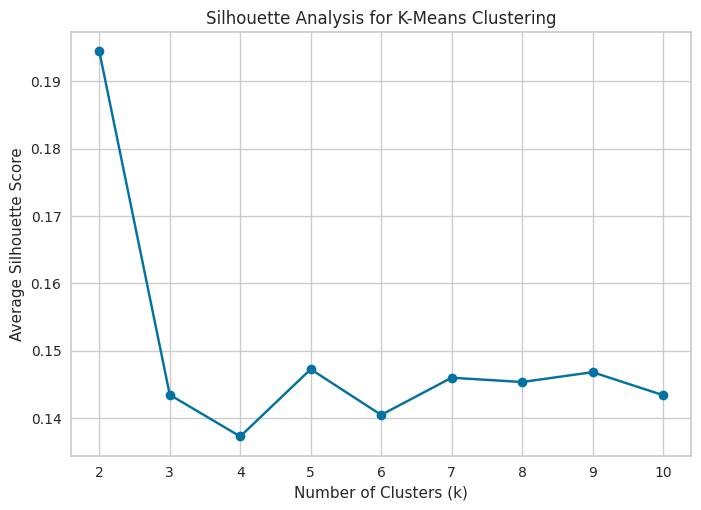

The highest average Silhouette score is 0.19443384918972914 with k=2.
The second highest average Silhouette score is 0.1472446181020135 with k=5.


In [783]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


k_values = range(2, 11)
silhouette_avg_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)


best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)


silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]


plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()


print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")


as you can see above We found that the optimal number of clusters (k) maximizing the average Silhouette coefficient is 2 , which will be our first k-means choice.

### Elbow method

The Elbow method helps identify the optimal number of clusters for K-means by plotting the within-cluster sum of squares (inertia) against the number of clusters. The “elbow” point indicates where adding more clusters yields minimal reduction in inertia, balancing compactness and avoiding overfitting.

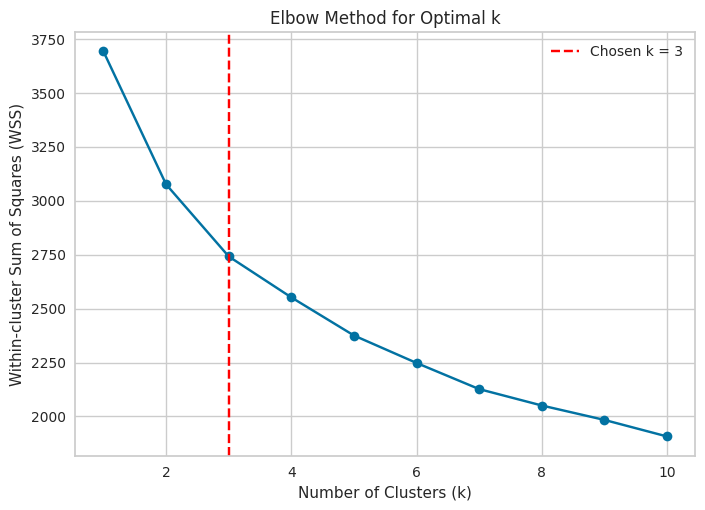

The optimal number of clusters based on Elbow Method is k = 3


In [784]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator


X_scaled = df_scaled


wss_values = []
k_values = range(1, 11)


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.inertia_)


plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')


knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow


plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


print(f"The optimal number of clusters based on Elbow Method is k = {turning_point}")



After analyzing the elbow plot, we identified a second turning point that corresponds to the second-highest average Silhouette coefficient. This turning point represents a different cluster configuration so k=9 will be our choice for the third k-means clustering. By considering this additional turning point, we aim to capture a diverse range of cluster formations and maximize the potential clustering performance.

### k-means clustering, visualization, and evaluation:

In this section, we will apply K-means clustering using three predetermined values for K and visualize the outcomes. We will then assess the clustering quality by computing WSS, Bcubed precision and recall, and the average Silhouette score for each cluster.

 K=3

In [785]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


np.random.seed(8953)


kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_result = kmeans.fit(scaled_features)

print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)


Cluster Centers:
[[-0.11521703  0.05684462 -0.51141468 -0.82847831 -0.45071669 -1.34353519
  -0.3100172  -0.08326289 -0.72116207 -0.33254659  0.41145144 -0.34339881
   0.34857809]
 [-0.2379163   0.79712926  0.98011422  0.50593044  1.1408522   0.30202225
  -0.25743936  0.02538794  0.41213641 -0.2818416  -0.63982009  0.95630197
  -0.85714458]
 [ 0.21010743 -0.5115098  -0.28908764  0.1807829  -0.42101541  0.60423799
   0.33570444  0.033444    0.17432059  0.36351682  0.14335122 -0.37302496
   0.31050263]]

Cluster Labels:
[2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 0 2 2 2 2 1 2 0 1 2 1 2 2 0 2
 1 1 1 1 2 1 0 2 2 2 0 0 2 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 1 1 1 1 0 1 2
 0 2 2 1 0 1 2 1 1 0 1 2 2 1 2 1 0 1 2 1 2 2 0 0 1 1 1 0 0 2 2 1 1 1 1 1 0
 0 0 2 1 2 2 2 2 2 1 2 2 1 0 0 2 1 2 2 2 1 1 2 1 1 2 2 1 2 1 1 2 1 0 2 1 1
 0 0 2 2 2 2 0 1 0 2 2 2 2 2 2 0 2 0 1 2 0 2 1 1 2 0 2 2 2 1 2 0 2 1 2 1 1
 2 1 0 1 2 2 2 2 2 1 0 2 2 1 0 1 2 2 1 0 0 0 1 0 1 0 0 0 2 1 1 2 1 2 0 2 2
 2 1 0 0 1 2 1 1 1 2 2 0 2

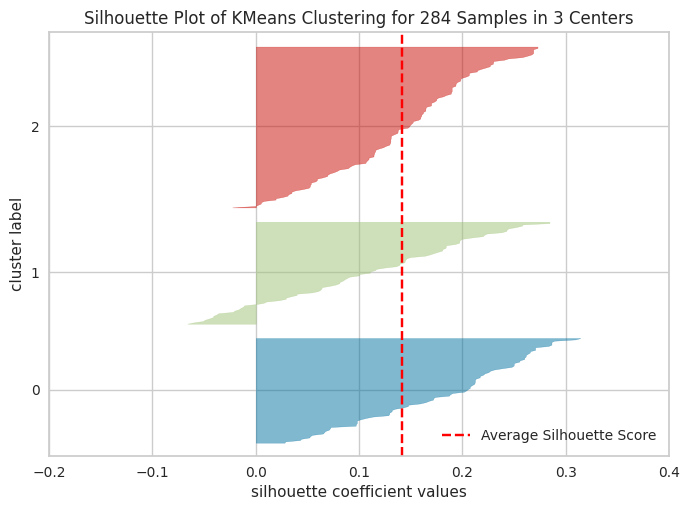

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 284 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [786]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init=10)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()



The silhouette plot for KMeans clustering of 284 samples across 3 centers shows that most positive silhouette scores indicate good alignment of samples within their clusters and separation from neighboring clusters. However, some scores near 0 or negative suggest potential overlap or ambiguity, with a few samples lying near the boundaries between clusters.

In [787]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

X = df_scaled

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_


wss = kmeans.inertia_


silhouette_avg = silhouette_score(X, labels)


print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 2741.921553184225
Average Silhouette Score: 0.14343697006412234




1.   WSS: 2741.92 The low WSS suggests good compactness within clusters, with points relatively close to their respective centroids.
2.   Average Silhouette Score: 0.1434 The low silhouette score indicates that the clusters may not be well-separated, suggesting possible overlap or ambiguity between clusters.



 K=2

In [788]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  
kmeans_result = kmeans.fit(df_scaled)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 0.11248674 -0.33895927 -0.41864175 -0.19937284 -0.46982556 -0.08869064
   0.10698091 -0.00608738 -0.14070612  0.11175214  0.24683262 -0.38194232
   0.32370468]
 [-0.2633513   0.79356346  0.98011422  0.46676701  1.09994455  0.20764044
  -0.25046119  0.01425162  0.32941786 -0.26163148 -0.57787871  0.89419438
  -0.75784977]]

Cluster Labels:
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


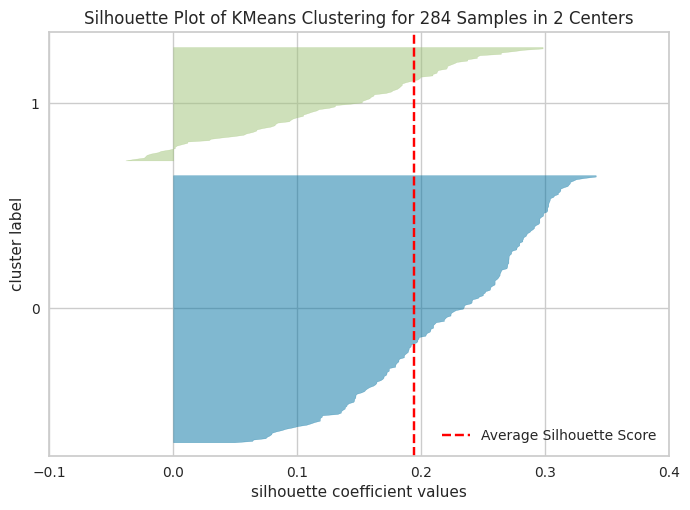

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 284 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [789]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init=10)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()



The silhouette plot for KMeans clustering of 284 samples across 2 centers shows that most silhouette scores are positive, indicating that the samples are generally well-aligned with their respective clusters and exhibit sufficient separation from neighboring clusters. However, there are some scores close to zero, and a few negative values, particularly in the first cluster, which may suggest potential overlap or ambiguity between clusters in certain areas. This implies that while the clustering structure is reasonably defined, there may still be some boundary samples that are less clearly associated with a specific cluster.

In [790]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


X = df_scaled

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_

wss = kmeans.inertia_


silhouette_avg = silhouette_score(X, labels)


print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 3075.9630284729824
Average Silhouette Score: 0.19443384918972914



1.  WSS: 3075.96 – This relatively low WSS suggests good internal cohesion, with points close to their cluster centers.
2.   Average Silhouette Score: 0.1944 – The low silhouette score indicates poor separation, with possible overlap or ambiguity between clusters.




K=10

In [791]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


np.random.seed(8953)

kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_result = kmeans.fit(scaled_features)


print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-0.32908392  0.82186867  0.98011422  0.13820406  0.76321085  0.50807844
   0.4215542  -0.29685452  0.21180243 -0.3166631   0.3720504   1.14711445
   0.03921503]
 [-0.8370178   0.17047616 -0.05039666 -0.99781827 -0.35675808 -1.45632384
   0.30164833 -0.03503252 -0.5137473   0.13601637  0.4012174  -0.50659369
   0.34857809]
 [ 0.73295965  0.89141276  0.92286361 -1.02831551 -0.52517446  0.39443533
   0.523013   -0.27305252 -0.05550536  0.73958899  0.36232807 -0.28108804
   0.23608243]
 [-0.26813186  0.75383029  0.98011422  0.65147267  1.50794809 -0.59913012
  -1.52239654 -0.05597828 -0.47708794 -1.07112888 -0.65035013  1.37863359
  -0.1464028 ]
 [-0.36294618  0.75383029  0.98011422  0.62463509  1.1522527   0.61522765
   0.27951187  0.27915388  1.06871485  0.37744541 -1.23213453  0.5683166
  -2.04382952]
 [ 0.54456235 -1.17558933 -0.17863801  0.4099345  -0.62622429  0.60094109
   0.523013    2.01765194  0.00681554  0.08773056  0.06832472 -0.4073712
   0.54657044]
 [-0.40

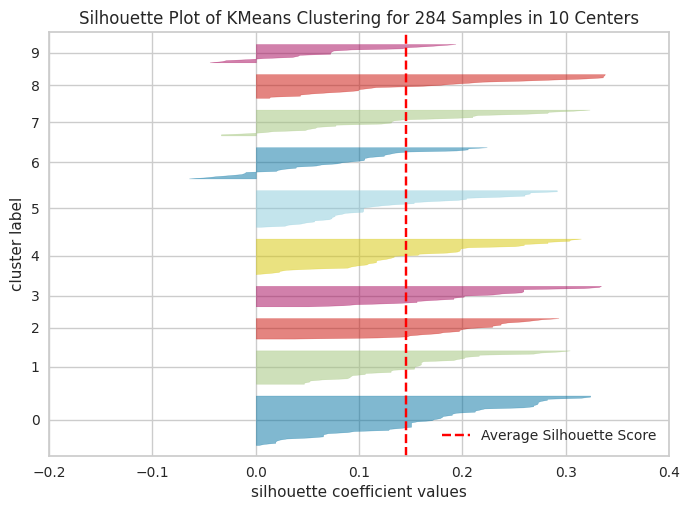

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 284 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [792]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=10, n_init=10)


visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

visualizer.fit(df_scaled)
visualizer.show()

From the silhouette plot of KMeans clustering for 284 samples in 10 centers, most positive Silhouette values indicate that the samples fit well within their clusters and are distant from other clusters, suggesting that the clustering effectively separated the data into distinct groups.

However, this does not mean the clustering is perfect, as there is some overlap or ambiguity between clusters, shown by samples with scores close to 0 or negative, indicating that some samples may lie near cluster boundaries.

In [793]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


X = df_scaled


kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(X_scaled)
labels = kmeans.labels_


wss = kmeans.inertia_


silhouette_avg = silhouette_score(X, labels)


print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 1907.3607029133414
Average Silhouette Score: 0.14339680075215874




1.   WSS: 1790.58  This low WSS value indicates good compactness within clusters, with data points close to their respective centers.
2.   Average Silhouette Score: 0.148  The low silhouette score suggests weak separation between clusters, with possible overlap or ambiguity.



### Evaluate the best models of Clustring:

In [794]:
import pandas as pd


data = {
    'K=3': [2515.9177492670883,0.15157781280291405],
    'K=4': [2348.4634232330413,0.15241061352492832],
    'K=10': [1790.5827176054447,0.1479657232194208]
}



df = pd.DataFrame(data, index=['WSS', 'Average Silhouette Score'])


df


K=3          K=4         K=10
WSS                       2515.917749  2348.463423  1790.582718
Average Silhouette Score     0.151578     0.152411     0.147966

Based on the attached table, we observe the following values for WSS and Average Silhouette Score with different values of K:

For K=3:
WSS = 2515.92: Indicates moderate compactness within clusters, with a relatively high value compared to other options.
Average Silhouette Score = 0.1516: A low score, suggesting that cluster separation is not very clear and there may be some overlap.

--------------------------------------------------------------------------------
For K=4:
WSS = 2348.46: Lower than the value for K=3, indicating improved compactness within clusters.
Average Silhouette Score = 0.1524: Slightly higher than  K=3, indicating a minor improvement in cluster separation, though still relatively weak.

--------------------------------------------------------------------------------
For K=10:
WSS = 1790.58: The lowest value, indicating the greatest compactness within clusters.
Average Silhouette Score = 0.1480: A low score, suggesting that cluster separation is not very clear, with possible overlap or ambiguity.

------------------------------------------------------------------------
**Final Evaluation:** Although K=10 achieved the lowest WSS value, indicating better compactness within clusters, its Average Silhouette Score was also lower, suggesting that cluster separation may not be very clear.
K=4 provides a better balance between the two values, with a lower WSS compared to K=3 and a slightly higher Silhouette Score, making it a reasonable choice for distinguishing between clusters.






